# Problem Statement - II

### Identify the missing and incorrect data

In [1]:
#importing libraries
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings   
warnings.filterwarnings("ignore")

In [3]:
# importing data 
data2 = pd.read_csv("previous_application.csv")

In [4]:
data2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [5]:
data2.shape

(1670214, 37)

In [6]:
#Checking data types
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:
# Checking the numeric variables 
data2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

#### Key Takeaways

Columns having negative and positive values including days. needed fixing

In [8]:
#creating a function
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

In [9]:
#checking null values in percentage.
null_values(data2)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

#### Null values more than 50 %

In [10]:
prev_null_50 = null_values(data2)[null_values(data2)>50]

In [11]:
prev_null_50

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

In [12]:
print("Num of columns having missing values more than 50% :",len(prev_null_50))

Num of columns having missing values more than 50% : 4


In [13]:
#Drop all columns that have more than 50% missing values. 
data2.drop(columns = prev_null_50.index, inplace = True)

#### Null values more than 15%

In [14]:
prev_null_15 = null_values(data2)[null_values(data2)>15]

In [15]:
prev_null_15

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [16]:
print("Num of columns having missing values more than 50% :",len(prev_null_15))

Num of columns having missing values more than 50% : 10


In [17]:
data2[prev_null_15.index]

NAME_TYPE_SUITE  DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
0                    NaN            365243.0             -37.0          -42.0   
1          Unaccompanied            365243.0          365243.0       365243.0   
2        Spouse, partner            365243.0          365243.0       365243.0   
3                    NaN            365243.0            -177.0         -182.0   
4                    NaN                 NaN               NaN            NaN   
...                  ...                 ...               ...            ...   
1670209              NaN            365243.0            -351.0         -358.0   
1670210    Unaccompanied            365243.0           -1297.0        -1304.0   
1670211  Spouse, partner            365243.0           -1181.0        -1187.0   
1670212           Family            365243.0            -817.0         -825.0   
1670213           Family            365243.0            -423.0         -443.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
0                            300.0           -42.0                        0.0   
1                            916.0          -134.0                        1.0   
2                             59.0          -271.0                        1.0   
3                           -152.0          -482.0                        1.0   
4                              NaN             NaN                        NaN   
...                            ...             ...                        ...   
1670209                      362.0          -508.0                        0.0   
1670210                    -1274.0         -1604.0                        0.0   
1670211                    -1187.0         -1457.0                        0.0   
1670212                     -825.0         -1155.0                        1.0   
1670213                      247.0         -1163.0                        0.0   

         AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  
0                17145.0     1730.430         12.0  
1               607500.0    25188.615         36.0  
2               112500.0    15060.735         12.0  
3               450000.0    47041.335         12.0  
4               337500.0    31924.395         24.0  
...                  ...          ...          ...  
1670209         267295.5    14704.290         30.0  
1670210          87750.0     6622.020         12.0  
1670211         105237.0    11520.855         10.0  
1670212         180000.0    18821.520         12.0  
1670213         360000.0    16431.300         48.0  

[1670214 rows x 10 columns]

In [18]:
data2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [19]:
# Listing unwanted columns
prev_unwanted = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

data2.drop(prev_unwanted,axis =1, inplace = True)

data2.shape

(1670214, 29)

In [20]:
# Imputing categorical column
data2["NAME_TYPE_SUITE"] = data2["NAME_TYPE_SUITE"].fillna("Unknown")

null_values(data2)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
SK_ID_PREV                    0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_GOODS_CATEGORY 

#### Key Takeaways

Columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE_1ST_VERSION,' and 'DAYS_LAST_DUE' contain missing values and and these columns count days, therefore they will continue to contain null values.

In [21]:
#Analying numerical columns
data2[prev_null_15.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
count       997149.000000     997149.000000  997149.000000   
mean        342209.855039      81992.343838   76582.403064   
std          88916.115834     153303.516729  149647.415123   
min          -2922.000000      -2874.000000   -2889.000000   
25%         365243.000000      -1270.000000   -1314.000000   
50%         365243.000000       -499.000000    -537.000000   
75%         365243.000000        -44.000000     -74.000000   
max         365243.000000     365243.000000  365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
count              997149.000000   997149.000000              997149.000000   
mean                33767.774054    13826.269337                   0.332570   
std                106857.034789    72444.869708                   0.471134   
min                 -2801.000000    -2892.000000                   0.000000   
25%                 -1242.000000    -1628.000000                   0.000000   
50%                  -361.000000     -831.000000                   0.000000   
75%                   129.000000     -411.000000                   1.000000   
max                365243.000000   365243.000000                   1.000000   

       AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT  
count     1.284699e+06  1.297979e+06  1.297984e+06  
mean      2.278473e+05  1.595512e+04  1.605408e+01  
std       3.153966e+05  1.478214e+04  1.456729e+01  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       5.084100e+04  6.321780e+03  6.000000e+00  
50%       1.123200e+05  1.125000e+04  1.200000e+01  
75%       2.340000e+05  2.065842e+04  2.400000e+01  
max       6.905160e+06  4.180581e+05  8.400000e+01

#### Key Takeaways

There are columns with negative and positive values, as well as days. fixing is required

In [22]:
# Negative days must be converted to positive days.
prev_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

data2[prev_days_col].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count   1.670214e+06       997149.000000   997149.000000   
mean   -8.806797e+02       342209.855039    13826.269337   
std     7.790997e+02        88916.115834    72444.869708   
min    -2.922000e+03        -2922.000000    -2892.000000   
25%    -1.300000e+03       365243.000000    -1628.000000   
50%    -5.810000e+02       365243.000000     -831.000000   
75%    -2.800000e+02       365243.000000     -411.000000   
max    -1.000000e+00       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              997149.000000  997149.000000     997149.000000  
mean                33767.774054   76582.403064      81992.343838  
std                106857.034789  149647.415123     153303.516729  
min                 -2801.000000   -2889.000000      -2874.000000  
25%                 -1242.000000   -1314.000000      -1270.000000  
50%                  -361.000000    -537.000000       -499.000000  
75%                   129.000000     -74.000000        -44.000000  
max                365243.000000  365243.000000     365243.000000

In [23]:
data2[prev_days_col] = abs(data2[prev_days_col])

data2[prev_null_15.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
count       997149.000000     997149.000000  997149.000000   
mean        342340.056543      83505.775017   78152.730207   
std          88413.495220     152484.418802  148833.342466   
min              2.000000          2.000000       2.000000   
25%         365243.000000        447.000000     455.000000   
50%         365243.000000       1171.000000    1155.000000   
75%         365243.000000       2501.000000    2418.000000   
max         365243.000000     365243.000000  365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
count              997149.000000   997149.000000              997149.000000   
mean                35163.363265    15949.224065                   0.332570   
std                106405.950190    72007.270877                   0.471134   
min                     0.000000        2.000000                   0.000000   
25%                   257.000000      475.000000                   0.000000   
50%                   741.000000      921.000000                   0.000000   
75%                  1735.000000     1825.000000                   1.000000   
max                365243.000000   365243.000000                   1.000000   

       AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT  
count     1.284699e+06  1.297979e+06  1.297984e+06  
mean      2.278473e+05  1.595512e+04  1.605408e+01  
std       3.153966e+05  1.478214e+04  1.456729e+01  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       5.084100e+04  6.321780e+03  6.000000e+00  
50%       1.123200e+05  1.125000e+04  1.200000e+01  
75%       2.340000e+05  2.065842e+04  2.400000e+01  
max       6.905160e+06  4.180581e+05  8.400000e+01

In [24]:
#days group calculation
bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
data2['YEARLY_DECISION'] = pd.cut(data2['DAYS_DECISION'],bins,labels=slots)

In [25]:
data2['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

#### Key Takeaways

Nearly 35% of loan applicants submitted a fresh loan application within a year of the previous loan decision.

In [26]:
data2.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [27]:
null_values(data2)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
SK_ID_PREV                    0.00
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
SK_ID_CURR                    0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE  

#### Continuos Variables "AMT_ANNUITY", "AMT_GOODS_PRICE"

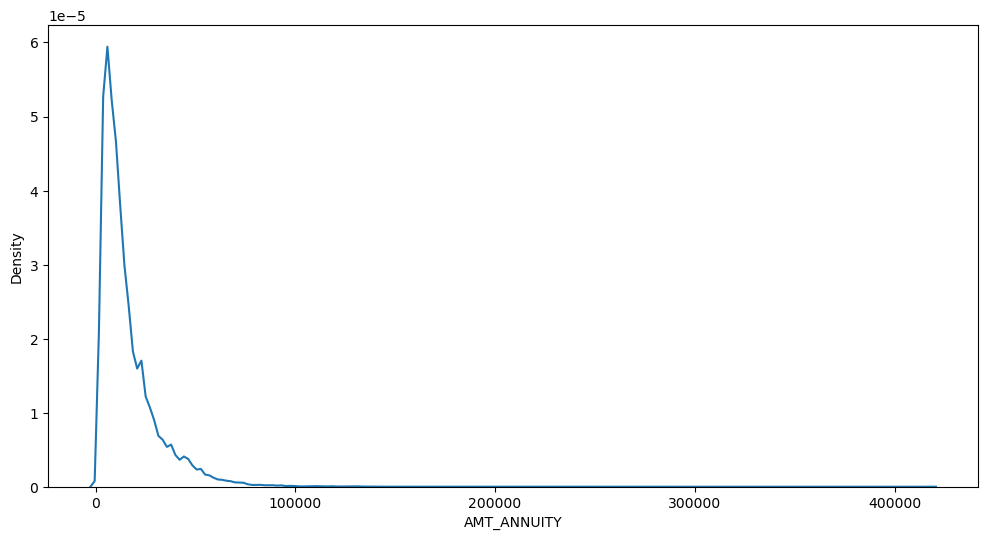

In [28]:
#Using a kdeplot to visualize the distribution of "AMT_ANNUITY"

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a KDE plot for the 'AMT_ANNUITY' column in 'prev_appl'
sns.kdeplot(data=data2['AMT_ANNUITY'])

# Display the plot
plt.show()

#### Key Takeaways

Since there is just one spike at the leftmost end of the distribution, imputing with the mean would not be the best course of action. Instead, imputing with the median would be appropriate.

In [29]:
#imputing missing values
data2['AMT_ANNUITY'].fillna(data2['AMT_ANNUITY'].median(),inplace = True)

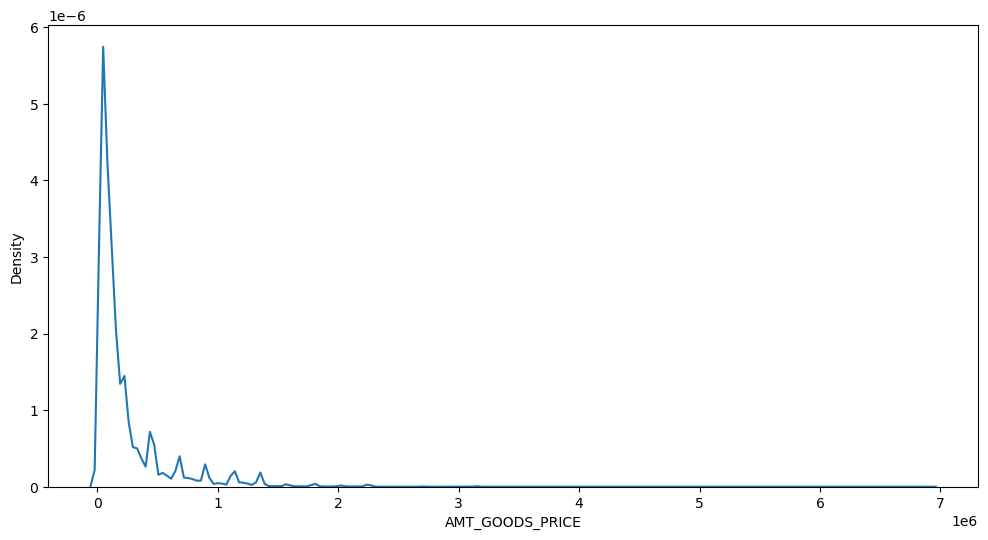

In [30]:
# Plotting kde plot for "AMT_GOODS_PRICE"
plt.figure(figsize=(12,6))
sns.kdeplot(data2['AMT_GOODS_PRICE'])
plt.show()

#### Key Takeaways

The distribution has numerous peaks in it. Check to determine if the distribution remains roughly the same after imputed using the mode, mean, and median.

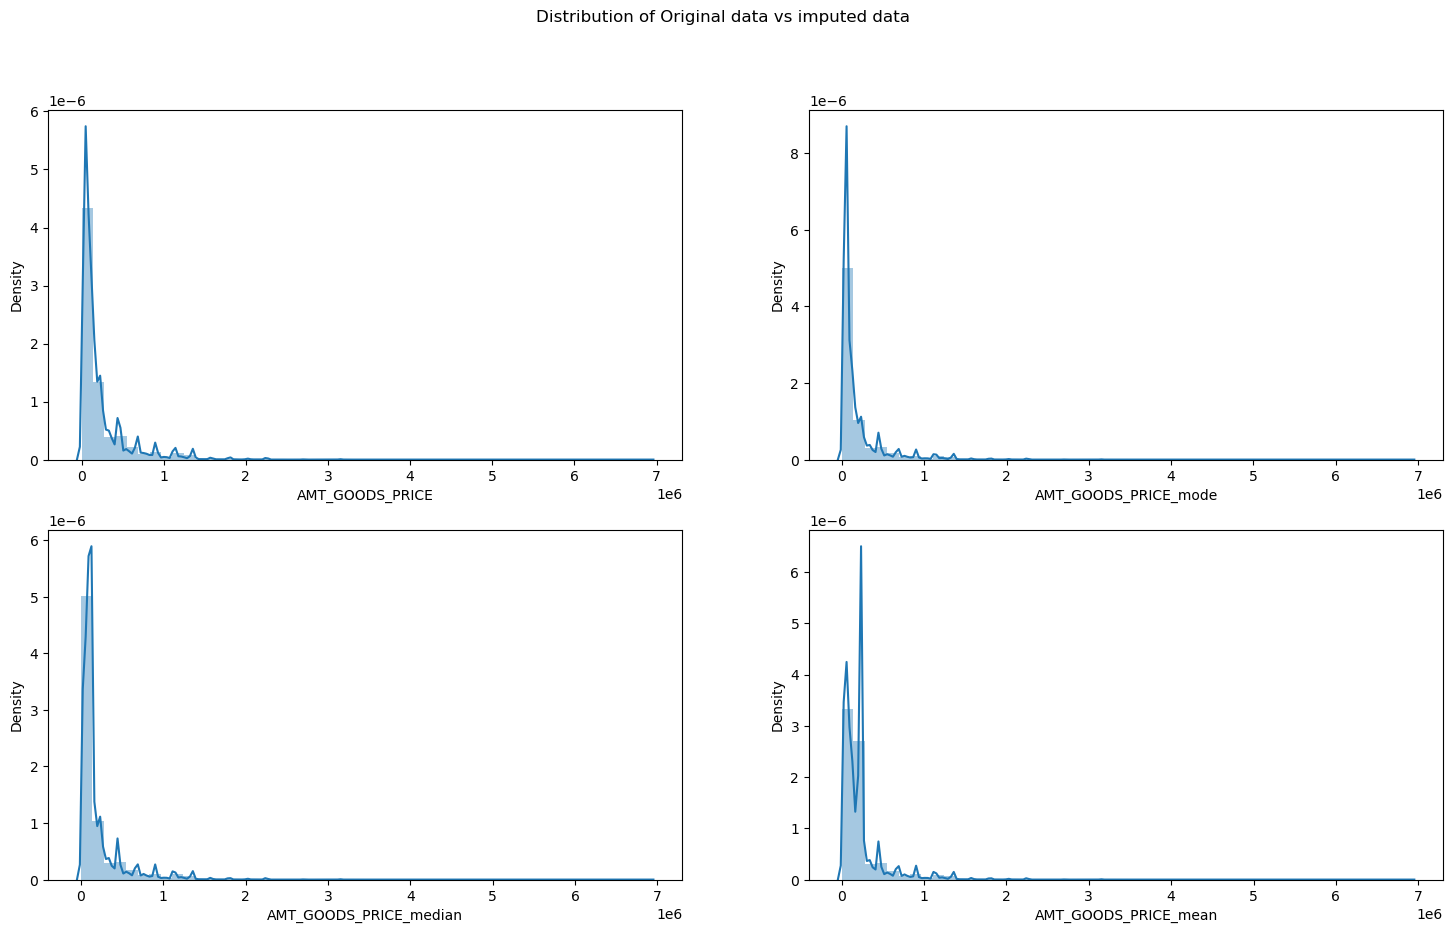

In [31]:
#Imputing

# Creating new dataframe for "AMT_GOODS_PRICE" 

DF = pd.DataFrame() 
DF['AMT_GOODS_PRICE_mode'] = data2['AMT_GOODS_PRICE'].fillna(data2['AMT_GOODS_PRICE'].mode()[0])
DF['AMT_GOODS_PRICE_median'] = data2['AMT_GOODS_PRICE'].fillna(data2['AMT_GOODS_PRICE'].median())
DF['AMT_GOODS_PRICE_mean'] = data2['AMT_GOODS_PRICE'].fillna(data2['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(data2['AMT_GOODS_PRICE'][pd.notnull(data2['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(DF[i[1]])

#### Key Takeaways

Since the original distribution and the distribution of the data imputed using mode are more similar in this instance, mode will be imputed for missing values.

In [32]:
# Using mode to input null values
data2['AMT_GOODS_PRICE'].fillna(data2['AMT_GOODS_PRICE'].mode()[0], inplace=True)

#### The majority of these loans were not initiated, as shown by the CNT_PAYMENT imput with 0 as the NAME_CONTRACT_STATUS.

In [33]:
data2.loc[data2['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [34]:
data2['CNT_PAYMENT'].fillna(0,inplace = True)

In [35]:
data2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'],
      dtype='object')

In [36]:
#Making the necessary category columns switch from object to categorical 
prev_catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in prev_catgorical_col:
    data2[col] =pd.Categorical(data2[col])

### Identifying outliers

In [37]:
data2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00   
75%    2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.670214e+06       997149.000000   997149.000000   
mean   1.247621e+01       342340.056543    15949.224065   
std    1.447588e+01        88413.495220    72007.270877   
min    0.000000e+00            2.000000        2.000000   
25%    0.000000e+00       365243.000000      475.000000   
50%    1.000000e+01       365243.000000      921.000000   
75%    1.600000e+01       365243.000000     1825.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

#### Key Takeaways

We were able to identify all of the columns that had a large discrepancy between the maximum and the 75th percentile, as well as those that make no sense to have such a high max value.

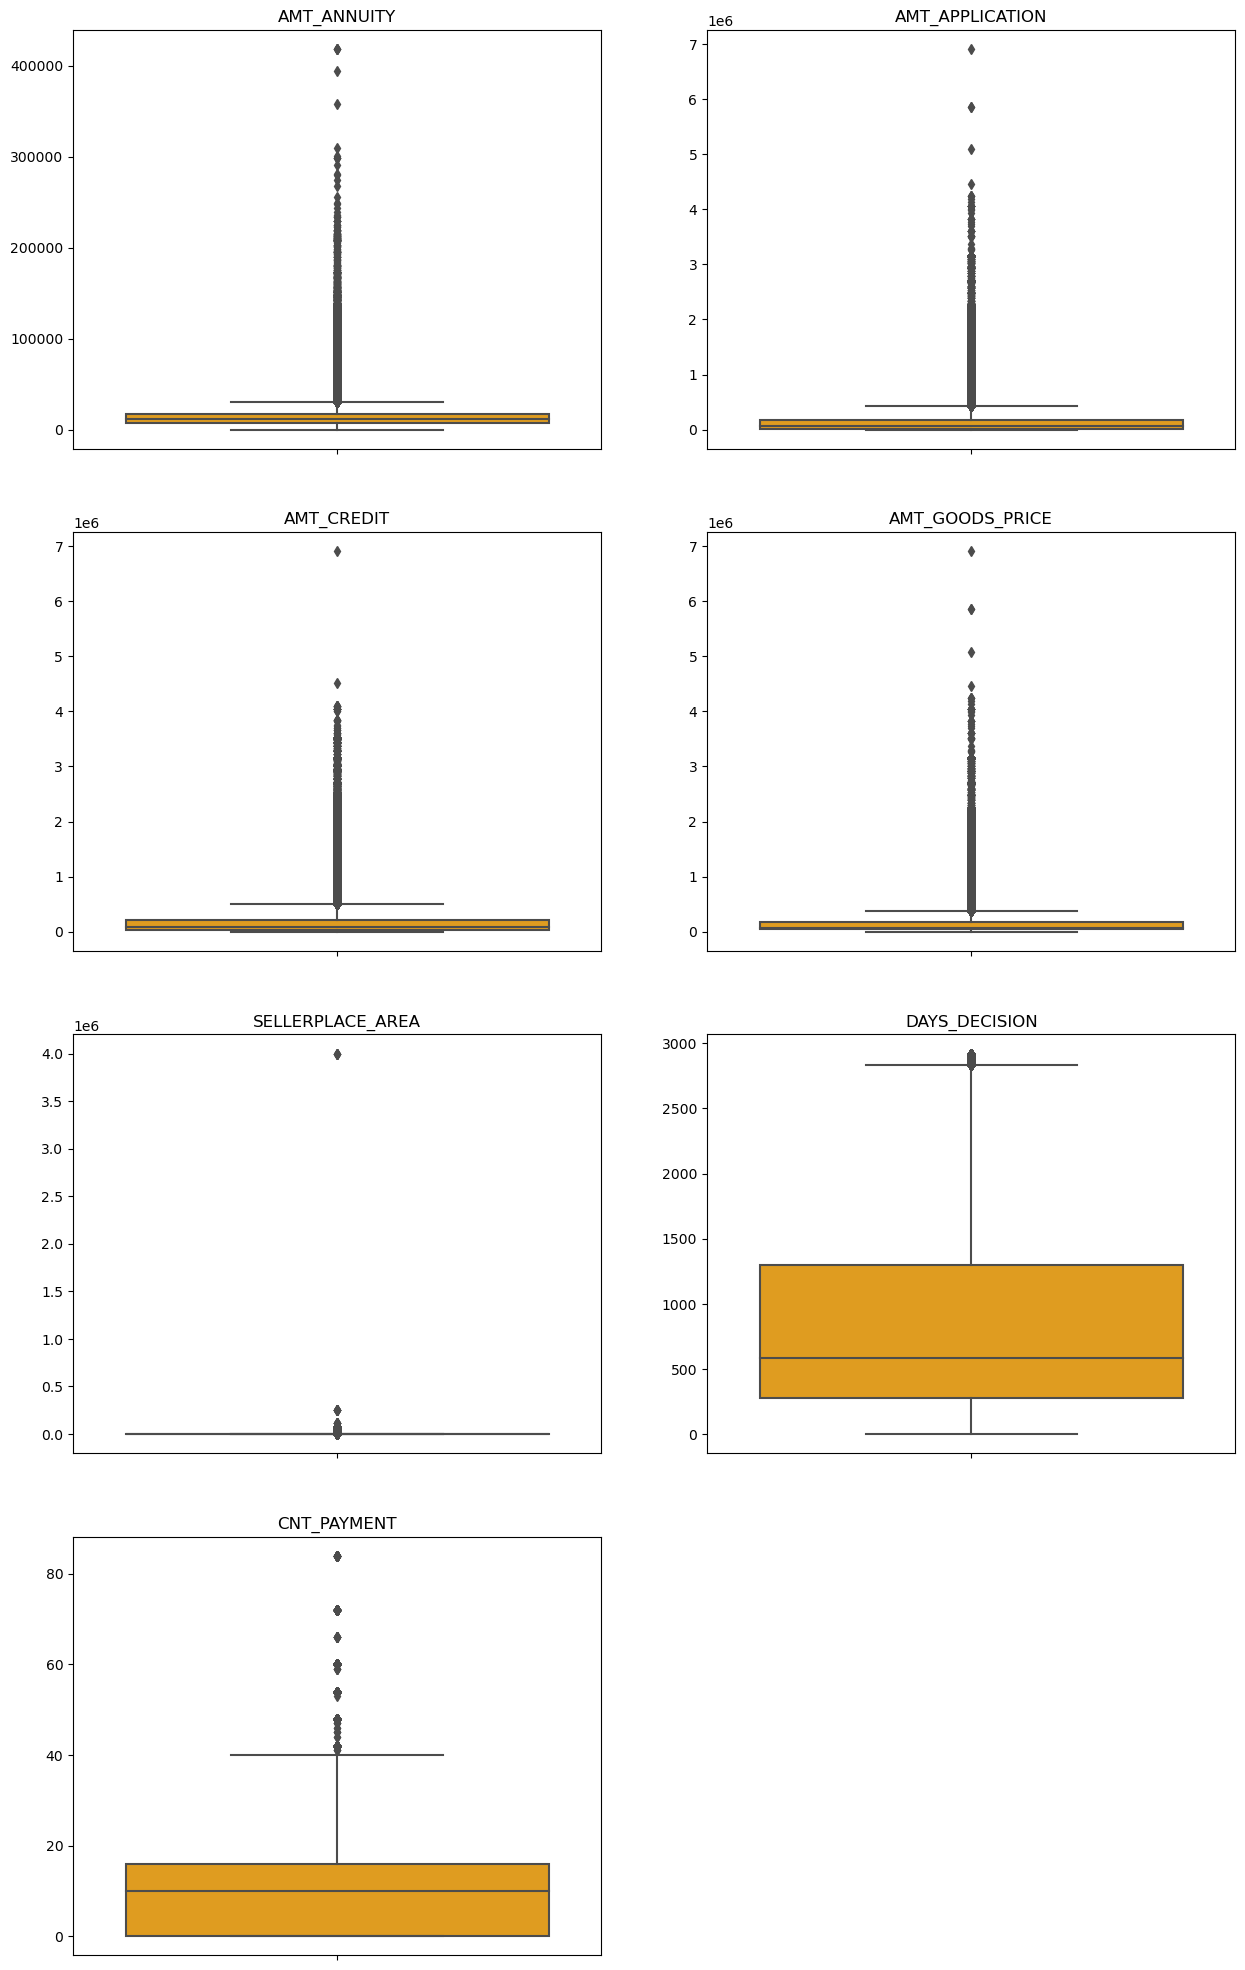

In [38]:
import itertools
prev_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(prev_outlier_col, range(len(prev_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = data2[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

#### Key Takeaways

Previous application data shows that AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, and SELLERPLACE_AREA have a large number of outliers. CNT_PAYMENT has a small number of outlier values.
DAYS_DECISION contains a small number of outliers, indicating that earlier application decisions were made a long time ago.

### Data Analysis

In [39]:
#Imbalance Data

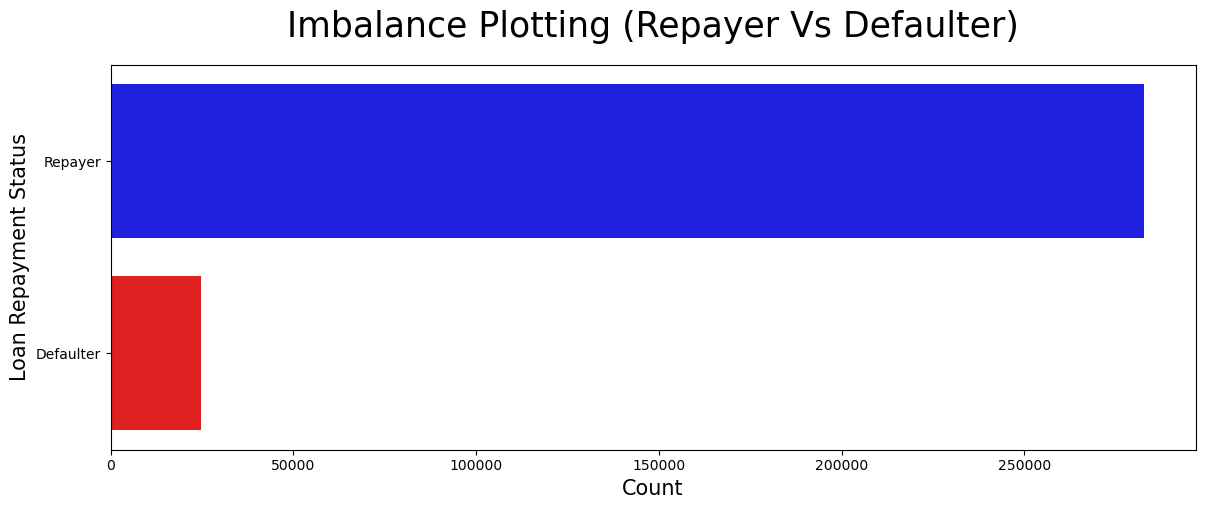

In [40]:
data1 = pd.read_csv("application_data.csv")
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = data1["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [106]:
#The imbalance percentage ratio with respect to defaulter and repayer is shown below. 

repayer = round((data1["TARGET"].value_counts()[0]/len(data1)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((data1["TARGET"].value_counts()[1]/len(data1)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("The imbalance ratio between Repayers and Defaulters is approximately 11.39/1.".format(repayer/defaluter))


Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
The imbalance ratio between Repayers and Defaulters is approximately 11.39/1.


In [42]:
#Important Function for Univariate analysis

In [110]:
# Building a function to determine whether a column is numerical or category 
def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
#Making a "univariate" function to analyze a single variable in relation to the target variable.

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
# Using the log scale if the plot is difficult to read.

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
            
# 1. Subplot 1
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2
        
        s = sns.barplot(ax=ax2, x=col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# Using the log scale if the plot is difficult to read.
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()

In [44]:
# function for generating repeating relationship charts in bivariate numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [45]:
# function for generating repeating barplots in bivariate categorical analysis.

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
#Using style dictionaries, define the labels and plot title's aesthetics.
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

In [46]:
#function for univariate categorical analysis on the merged df to plot repeating countplots

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

In [47]:
# Point plotting function 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [48]:
# keeping numerical and category columns as a list in the variables below

cat_col = list(data1.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(data1.select_dtypes(["int","float"]).columns)  #N Numerical Column list

#### Analysis of Categorical Variables

In [49]:
#Analysis of Segmented Univariate

In [50]:
#1 Examining the contract type in relation to loan repayment status

univariate(data1,"NAME_CONTRACT_TYPE","TARGET",False,False,True)


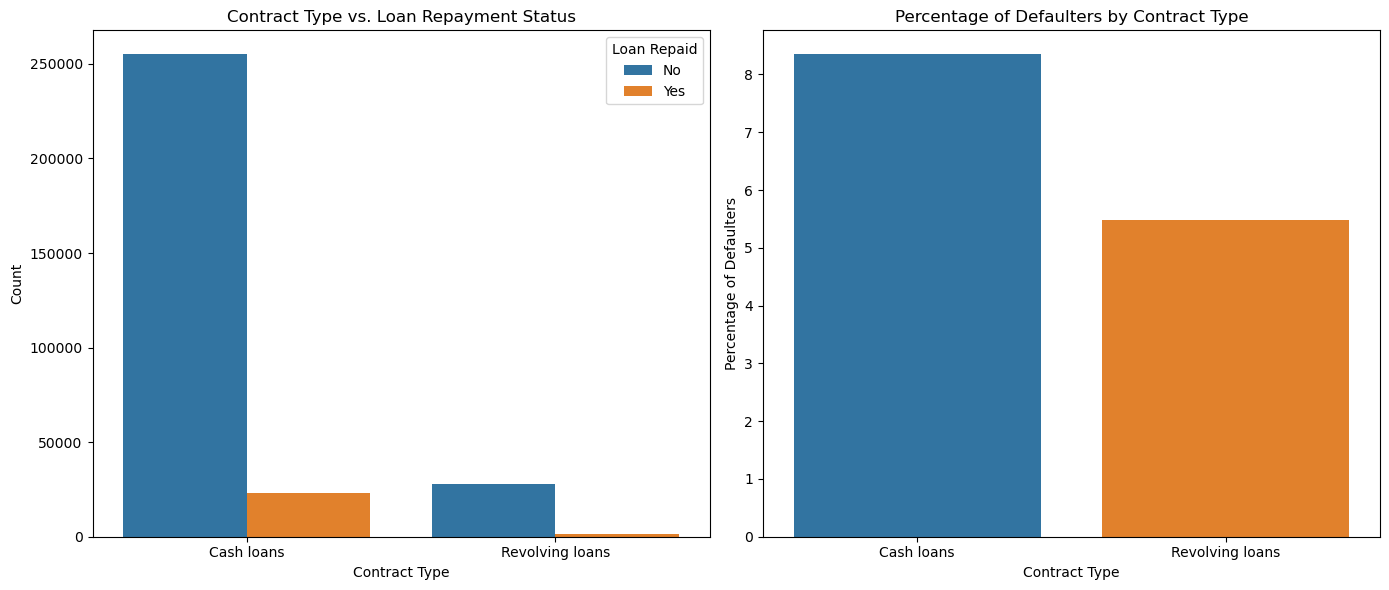

In [51]:
# Calculate the percentage of defaulters for each contract type
defaulter_percentages = data1.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean() * 100

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot 1: Distribution of Contract Types
sns.countplot(data=data1, x='NAME_CONTRACT_TYPE', hue='TARGET', ax=axes[0])
axes[0].set_title('Contract Type vs. Loan Repayment Status')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Loan Repaid', labels=['No', 'Yes'])

# Plot 2: Percentage of Defaulters by Contract Type
sns.barplot(x=defaulter_percentages.index, y=defaulter_percentages.values, ax=axes[1])
axes[1].set_title('Percentage of Defaulters by Contract Type')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Percentage of Defaulters')

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

#### Key Takeaways

Only 10% of all loans are revolving loans, which is a very tiny percentage.

Approximately 8–9% of people who apply for cash loans and 5%–6% of people who apply for revolving loans are defaulters.

In [52]:
#2 Examining the status of loan repayment according to the gender
univariate(data1,"CODE_GENDER","TARGET",True,False,True)

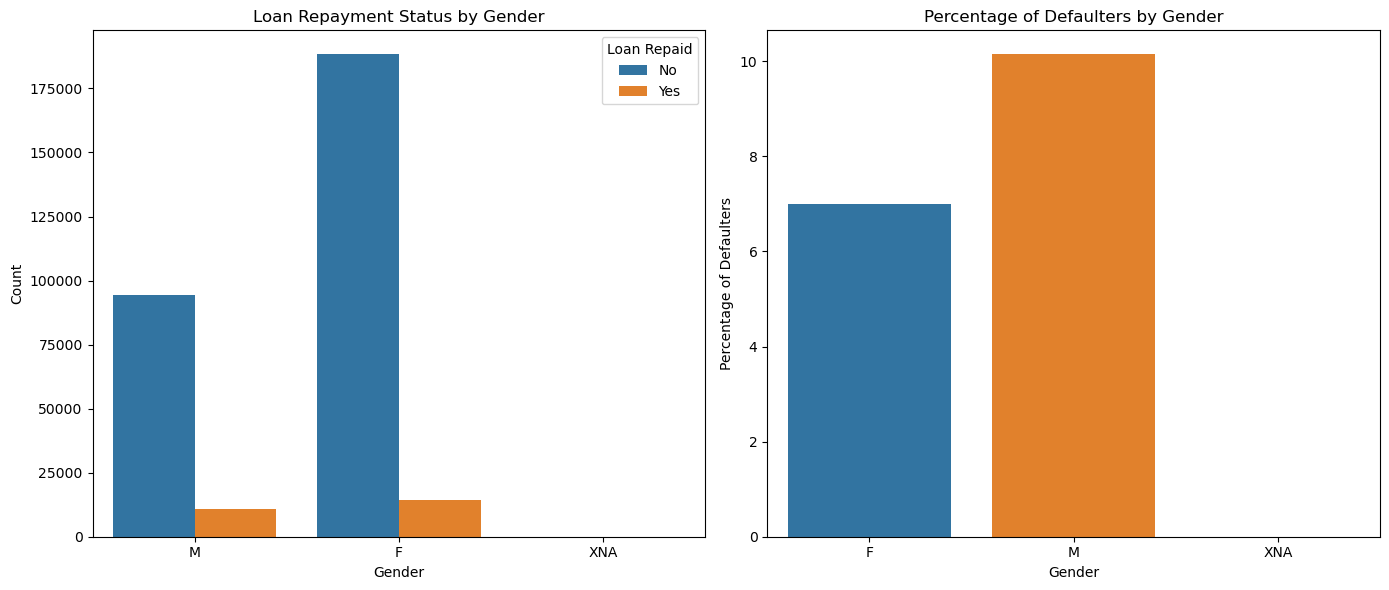

In [53]:
defaulter_percentages = data1.groupby('CODE_GENDER')['TARGET'].mean() * 100

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot 1: Distribution of Loan Repayment Status by Gender
sns.countplot(data=data1, x='CODE_GENDER', hue='TARGET', ax=axes[0])
axes[0].set_title('Loan Repayment Status by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Loan Repaid', labels=['No', 'Yes'])

# Plot 2: Percentage of Defaulters by Gender
sns.barplot(x=defaulter_percentages.index, y=defaulter_percentages.values, ax=axes[1])
axes[1].set_title('Percentage of Defaulters by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage of Defaulters')

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

#### Key Takeaway

The proportion of female customers is almost two times that of male customers.

According to the rate of defaulted credits, men have a 10% higher probability than women do of not repaying their loans.

In [54]:
#3 Determine whether or not ownership of real estate is related to loan repayment status.
univariate(data1,"FLAG_OWN_REALTY","TARGET",False,False,True)


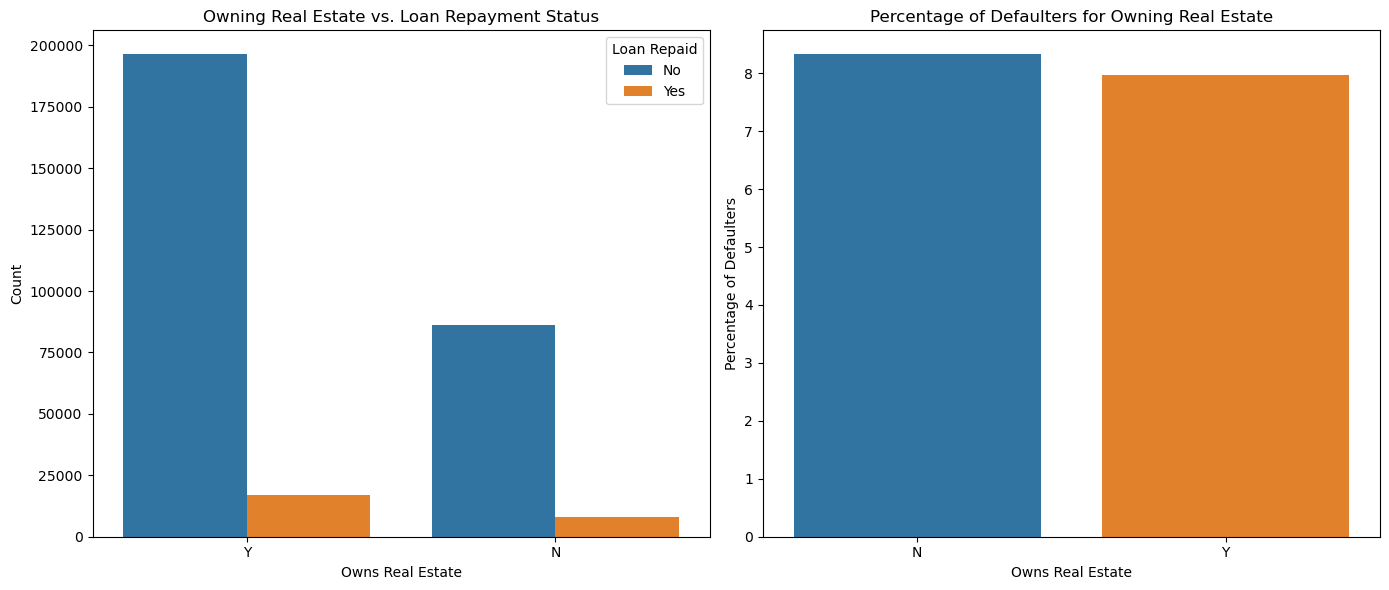

In [55]:

# Create a function to calculate the percentage of defaulters
def calculate_defaulter_percentages(data):
    defaulter_percentages = data.groupby('FLAG_OWN_REALTY')['TARGET'].mean() * 100
    return defaulter_percentages

# Calculate the percentage of defaulters for owning real estate
defaulter_percentages = calculate_defaulter_percentages(data1)

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot 1: Distribution of Owning Real Estate vs. Loan Repayment Status
sns.countplot(data=data1, x='FLAG_OWN_REALTY', hue='TARGET', ax=axes[0])
axes[0].set_title('Owning Real Estate vs. Loan Repayment Status')
axes[0].set_xlabel('Owns Real Estate')
axes[0].set_ylabel('Count')
axes[0].legend(title='Loan Repaid', labels=['No', 'Yes'])

# Plot 2: Percentage of Defaulters for Owning Real Estate
sns.barplot(x=defaulter_percentages.index, y=defaulter_percentages.values, ax=axes[1])
axes[1].set_title('Percentage of Defaulters for Owning Real Estate')
axes[1].set_xlabel('Owns Real Estate')
axes[1].set_ylabel('Percentage of Defaulters')

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()


#### Key Takeaway

More than twice as many clients own real estate as those who do not.

Both categories have around the same (8%) defaulter rates. Therefore, it follows that there is no corelation between owning a real estate and making a debt default.

In [56]:
#4 Examining the kind of housing in relation to loan repayment status
univariate(data1,"NAME_HOUSING_TYPE","TARGET",True,True,True)

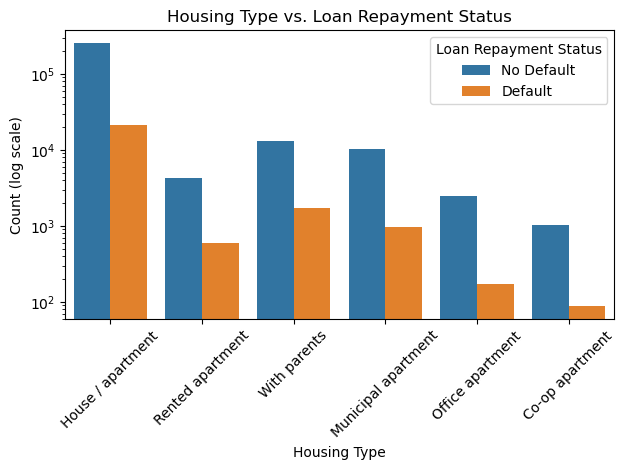

In [57]:
# Create a bar plot to visualize the relationship between housing type and loan repayment status
sns.countplot(data=data1, x='NAME_HOUSING_TYPE', hue='TARGET')

# Add labels and a legend
plt.xlabel('Housing Type')
plt.ylabel('Count (log scale)')  # Update the y-axis label
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.title('Housing Type vs. Loan Repayment Status')
plt.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # You can adjust the rotation angle as needed

# Show the plot
plt.tight_layout()  # Adjust subplot parameters for better spacing
plt.show()

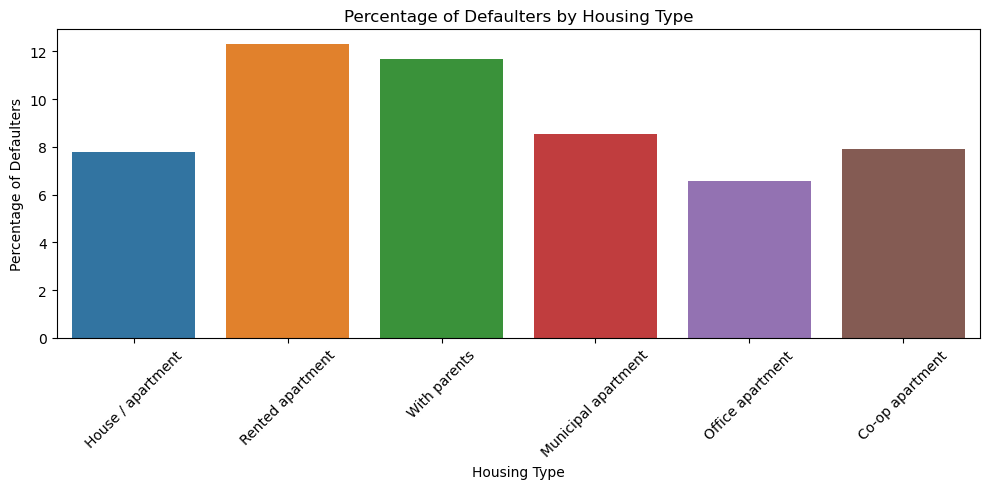

In [58]:
# Calculate the percentage of defaulters for each housing type
housing_type_percentages = data1.groupby('NAME_HOUSING_TYPE')['TARGET'].mean() * 100

# Specify the order of housing types
housing_types = ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']

# Create a bar plot to visualize the percentage of defaulters for each housing type
plt.figure(figsize=(10, 5))
sns.barplot(x=housing_type_percentages[housing_types].index, y=housing_type_percentages[housing_types].values)
plt.xlabel('Housing Type')
plt.ylabel('Percentage of Defaulters')
plt.title('Percentage of Defaulters by Housing Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Key Takeaways

Most individuals reside in homes or apartments.

The lowest rate of default is among those who live in office apartments.

People who live with their parents (11.5%) and in rented flats (>12%) are more likely to defaulting.

In [59]:
#5 Examining Family Status in Relation to Loan Repayment Status
univariate(data1,"NAME_FAMILY_STATUS","TARGET",True,True,True)

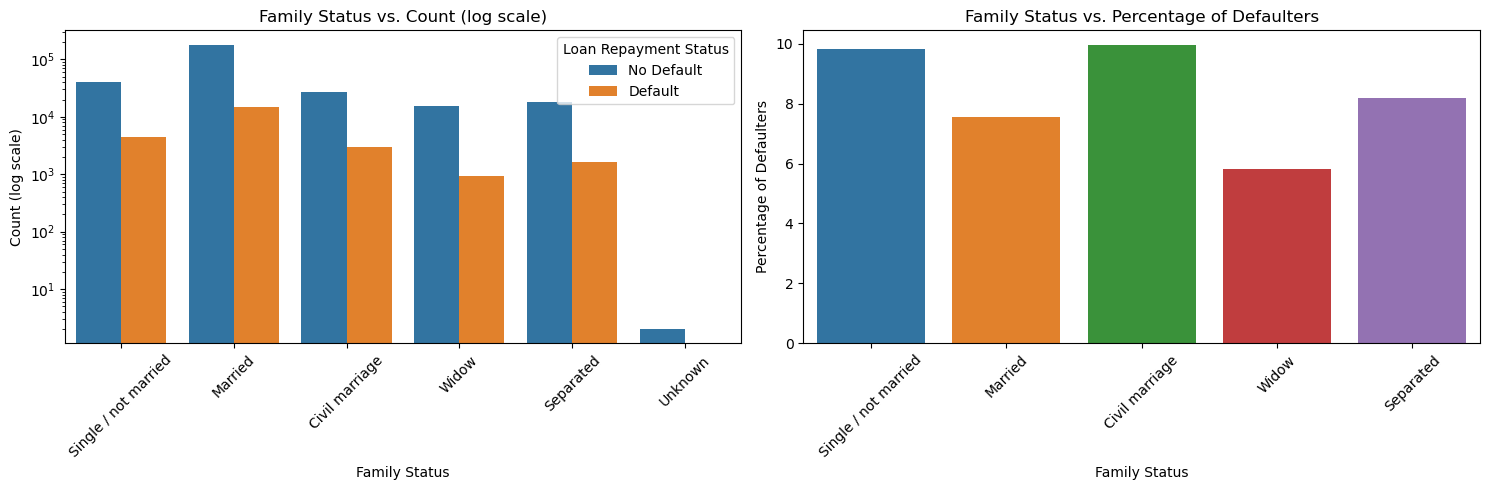

In [60]:
# Calculate the percentage of defaulters for each family status
family_status_percentages = data1.groupby('NAME_FAMILY_STATUS')['TARGET'].mean() * 100

# Specify the order of family status categories
family_statuses = ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Count of individuals in each family status (log scale)
sns.countplot(data=data1, x='NAME_FAMILY_STATUS', hue='TARGET', ax=ax1)
ax1.set_xlabel('Family Status')
ax1.set_ylabel('Count (log scale)')  # Update the y-axis label
ax1.set_yscale('log')  # Set the y-axis to logarithmic scale
ax1.set_title('Family Status vs. Count (log scale)')
ax1.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot 2: Percentage of defaulters in each family status
sns.barplot(x=family_status_percentages[family_statuses].index, y=family_status_percentages[family_statuses].values, ax=ax2)
ax2.set_xlabel('Family Status')
ax2.set_ylabel('Percentage of Defaulters')
ax2.set_title('Family Status vs. Percentage of Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


#### Key Takeaways 

The majority of those who have taken out loans are married, followed by single/unmarried and civil marriage.

Civil marriage has the highest percentage of defaulters (about 10%), while widows have the lowest (approximately 6%) (exception being Unknown).

In [61]:
#6 Examining Education Type in Relation to Loan Repayment Status
univariate(data1,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

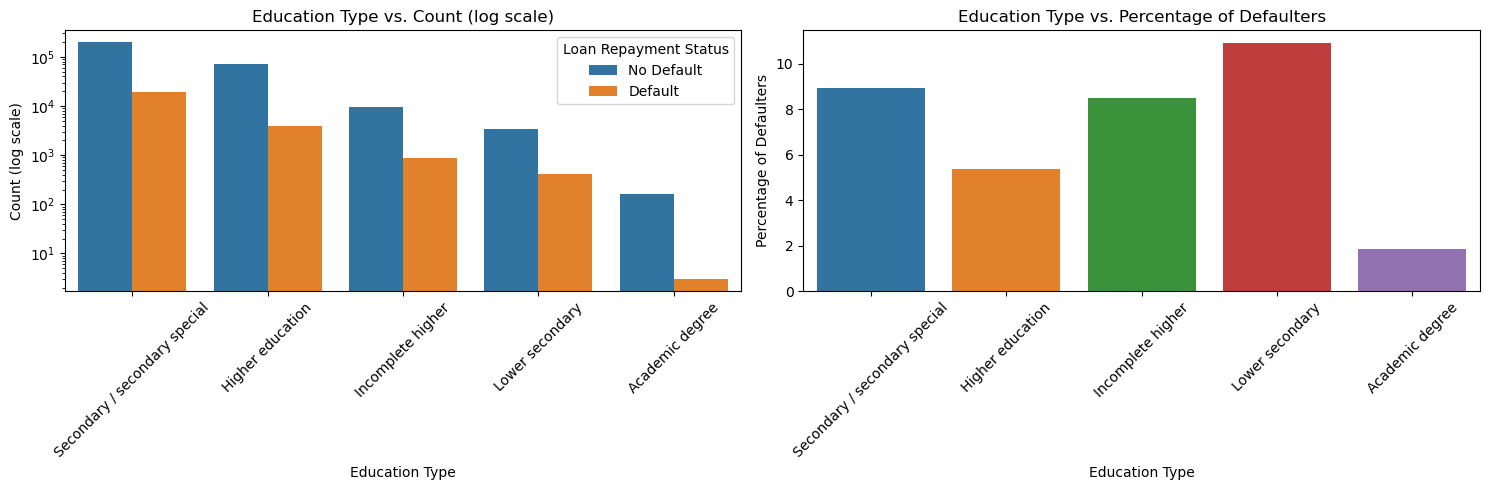

In [62]:
# Calculate the percentage of defaulters for each education type
education_type_percentages = data1.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean() * 100

# Specify the order of education types
education_types = ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Count of individuals in each education type (log scale)
sns.countplot(data=data1, x='NAME_EDUCATION_TYPE', hue='TARGET', ax=ax1, order=education_types)
ax1.set_xlabel('Education Type')
ax1.set_ylabel('Count (log scale)')  # Update the y-axis label
ax1.set_yscale('log')  # Set the y-axis to logarithmic scale
ax1.set_title('Education Type vs. Count (log scale)')
ax1.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot 2: Percentage of defaulters in each education type
sns.barplot(x=education_type_percentages[education_types].index, y=education_type_percentages[education_types].values, ax=ax2, order=education_types)
ax2.set_xlabel('Education Type')
ax2.set_ylabel('Percentage of Defaulters')
ax2.set_title('Education Type vs. Percentage of Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


#### Key Takeaways

Those with secondary or secondary special education make up the majority of clients, followed by those with higher education.

Academic degrees are very rare among clients

A high rate of default occurs in the lower secondary category, around 11%.

Defaulter rates are lowest among people with academic degrees.

In [63]:
#7 Examining different income types in relation to loan payback status
univariate(data1,"NAME_INCOME_TYPE","TARGET",True,True,True)

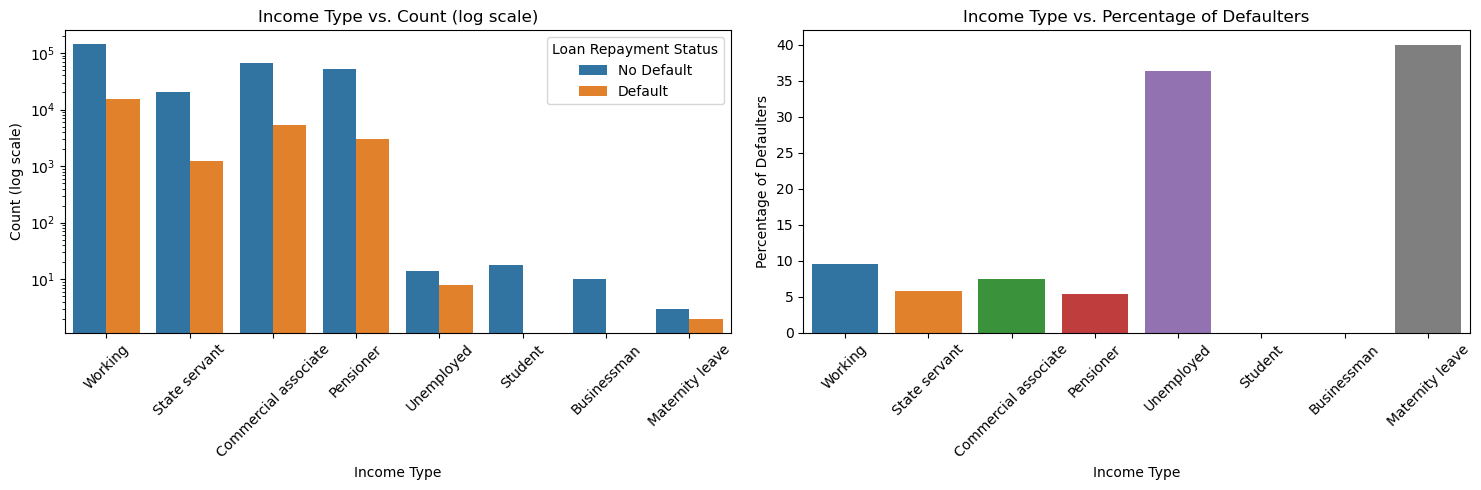

In [64]:
# Calculate the percentage of defaulters for each income type
income_type_percentages = data1.groupby('NAME_INCOME_TYPE')['TARGET'].mean() * 100

# Specify the order of income types
income_types = ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Count of individuals in each income type (log scale)
sns.countplot(data=data1, x='NAME_INCOME_TYPE', hue='TARGET', ax=ax1, order=income_types)
ax1.set_xlabel('Income Type')
ax1.set_ylabel('Count (log scale)')  # Update the y-axis label
ax1.set_yscale('log')  # Set the y-axis to logarithmic scale
ax1.set_title('Income Type vs. Count (log scale)')
ax1.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot 2: Percentage of defaulters in each income type
sns.barplot(x=income_type_percentages[income_types].index, y=income_type_percentages[income_types].values, ax=ax2, order=income_types)
ax2.set_xlabel('Income Type')
ax2.set_ylabel('Percentage of Defaulters')
ax2.set_title('Income Type vs. Percentage of Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


#### Key Takeaways

In terms of income type, the majority of applicants for loans have an income type of Working, followed by Commercial Associate, Pensioner, and State Servant.

Maternity leave applicants have the highest defaulting rate of 40%, followed by unemployed applicants (37%). There are around 10% defaultees under the rest.

Though they are fewer in number, students and businessmen do not have default records. Providing loans in these two categories is the safest option.

In [65]:
#8 Examining the Region rating of the applicant's residence based on loan repayment status
#univariate(data1,"REGION_RATING_CLIENT","TARGET",True,False,True)

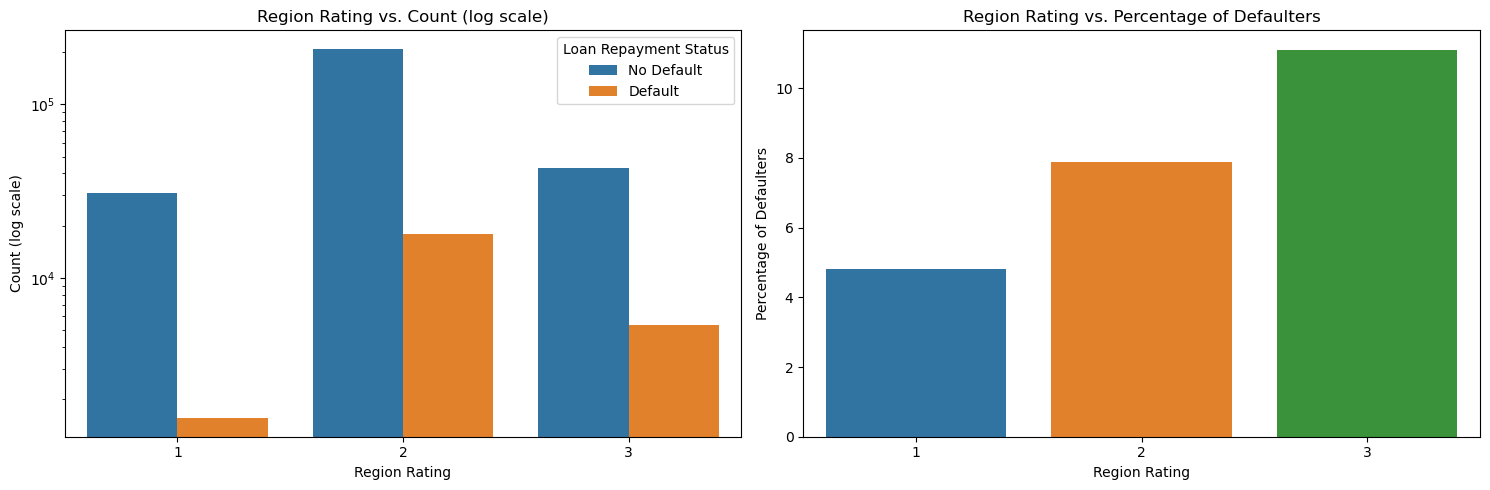

In [66]:
# Calculate the percentage of defaulters for each region rating
region_rating_percentages = data1.groupby('REGION_RATING_CLIENT')['TARGET'].mean() * 100

# Specify the order of region ratings
region_ratings = [1, 2, 3]

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Count of individuals in each region rating (log scale)
sns.countplot(data=data1, x='REGION_RATING_CLIENT', hue='TARGET', ax=ax1, order=region_ratings)
ax1.set_xlabel('Region Rating')
ax1.set_ylabel('Count (log scale)')  # Update the y-axis label
ax1.set_yscale('log')  # Set the y-axis to logarithmic scale
ax1.set_title('Region Rating vs. Count (log scale)')
ax1.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])

# Plot 2: Percentage of defaulters in each region rating
sns.barplot(x=region_rating_percentages[region_ratings].index, y=region_rating_percentages[region_ratings].values, ax=ax2, order=region_ratings)
ax2.set_xlabel('Region Rating')
ax2.set_ylabel('Percentage of Defaulters')
ax2.set_title('Region Rating vs. Percentage of Defaulters')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


#### Key Takeaways

The most common place of residence for applicants is a Rating 2 region. The default rate in Region Rating 3 is the highest (11%). An applicant residing in Region_Rating 1 has the lowest likelihood of default, making loan approval safer.

In [67]:
#9 Examining the applicant's occupation type based on loan repayment status
univariate(data1,"OCCUPATION_TYPE","TARGET",True,True,False)

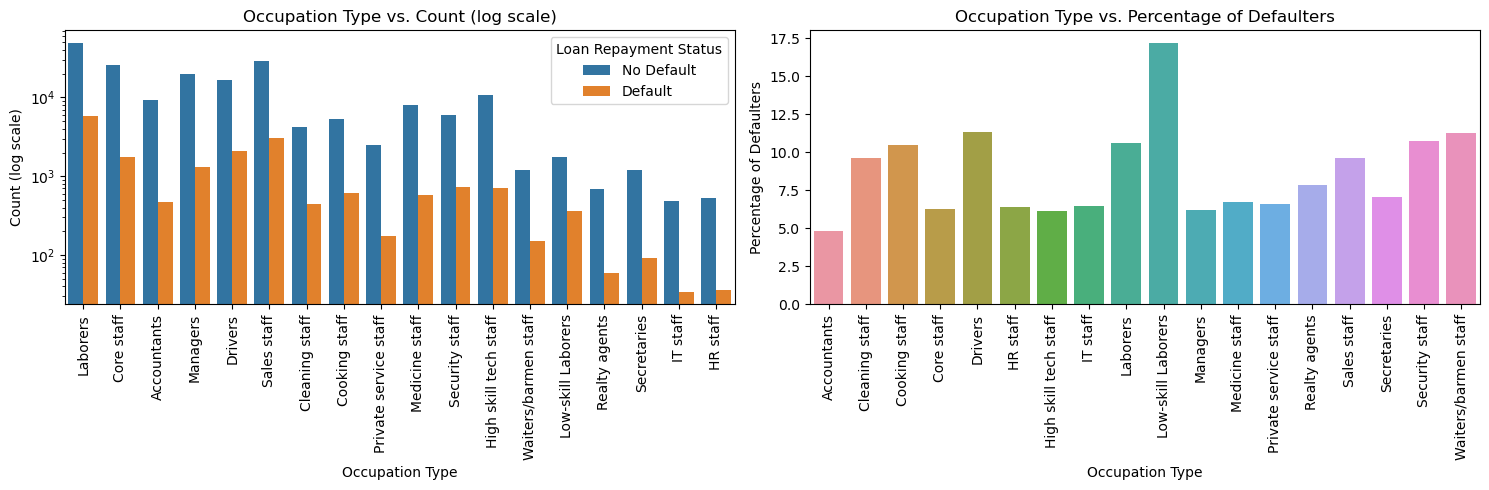

In [68]:

# Calculate the percentage of defaulters for each occupation type
occupation_type_percentages = data1.groupby('OCCUPATION_TYPE')['TARGET'].mean() * 100

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Count of individuals in each occupation type (log scale)
sns.countplot(data=data1, x='OCCUPATION_TYPE', hue='TARGET', ax=ax1)
ax1.set_xlabel('Occupation Type')
ax1.set_ylabel('Count (log scale)')  # Update the y-axis label
ax1.set_yscale('log')  # Set the y-axis to logarithmic scale
ax1.set_title('Occupation Type vs. Count (log scale)')
ax1.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot 2: Percentage of defaulters in each occupation type
sns.barplot(x=occupation_type_percentages.index, y=occupation_type_percentages.values, ax=ax2)
ax2.set_xlabel('Occupation Type')
ax2.set_ylabel('Percentage of Defaulters')
ax2.set_title('Occupation Type vs. Percentage of Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


#### Key Takeaways

Laborers take out the most loans, followed by Sales staff. Less IT staff will apply for loans. Low-skill laborers had the highest percentage of fraud (over 17%), followed by drivers, waiters/bartenders, laborers, Security staff, and Cooking staff.

In [69]:
#10 Examining loan repayment status according to the type of organization
univariate(data1,"ORGANIZATION_TYPE","TARGET",True,True,False)

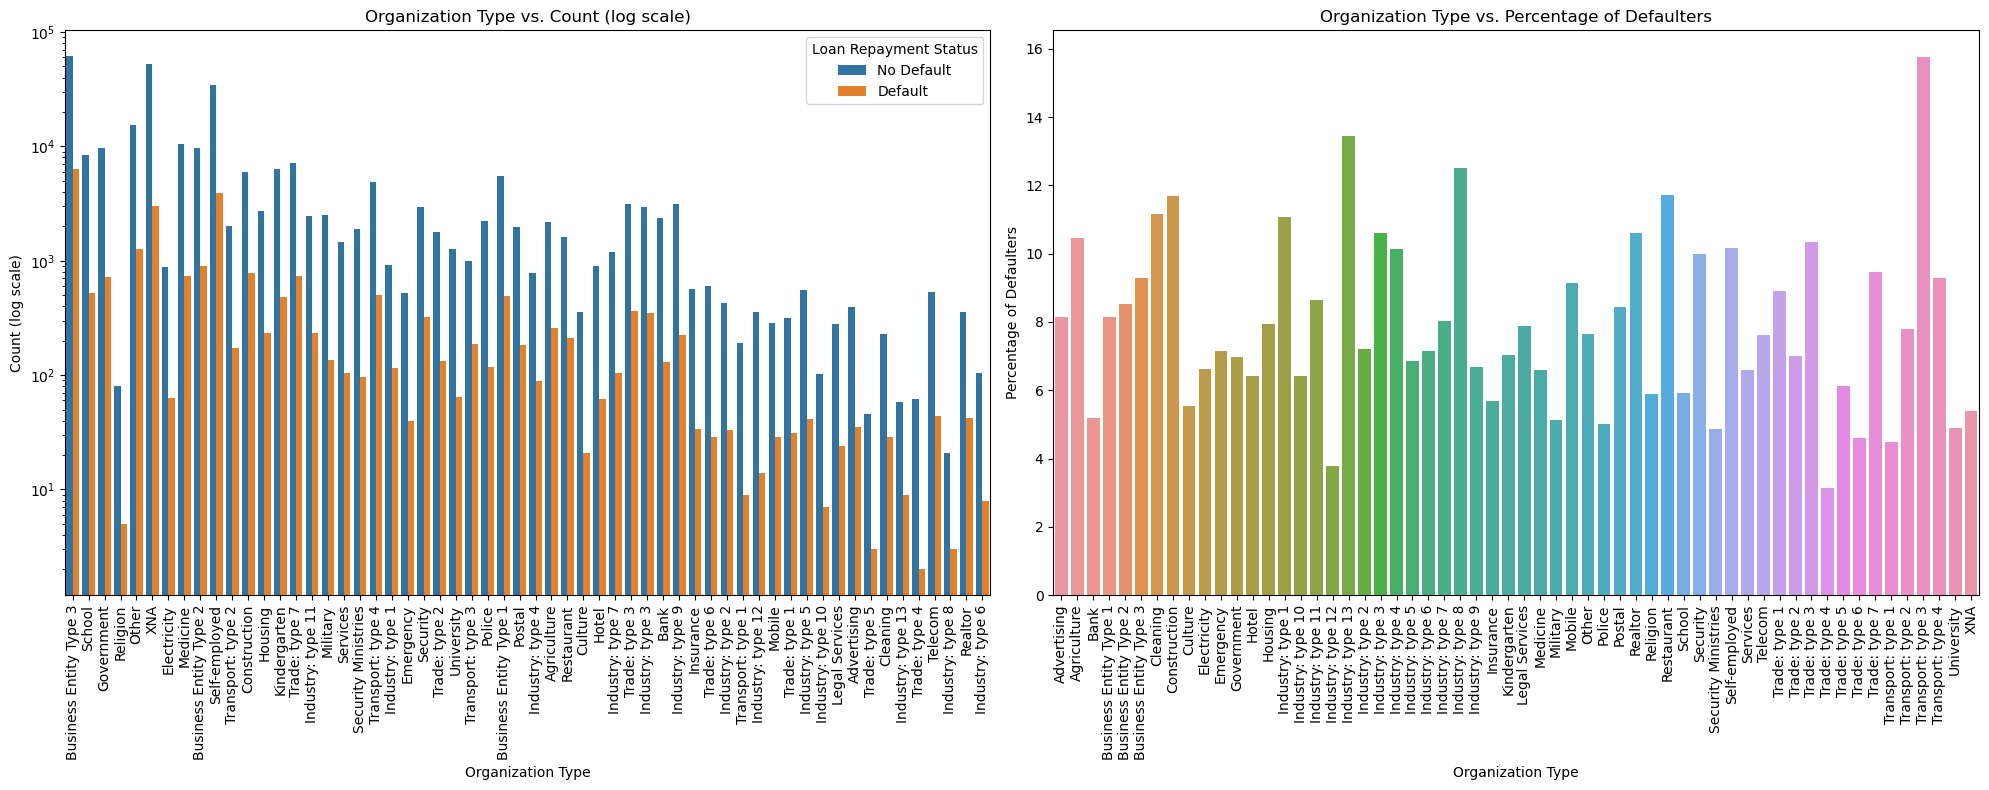

In [112]:
# Calculate the percentage of defaulters for each organization type
organization_type_percentages = data1.groupby('ORGANIZATION_TYPE')['TARGET'].mean() * 100

# Create a figure with subplots
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot 1: Count of individuals in each organization type (log scale)
sns.countplot(data=data1, x='ORGANIZATION_TYPE', hue='TARGET', ax=ax1)
ax1.set_xlabel('Organization Type')
ax1.set_ylabel('Count (log scale)')  # Update the y-axis label
ax1.set_yscale('log')  # Set the y-axis to logarithmic scale
ax1.set_title('Organization Type vs. Count (log scale)')
ax1.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot 2: Percentage of defaulters in each organization type
sns.barplot(x=organization_type_percentages.index, y=organization_type_percentages.values, ax=ax2)
ax2.set_xlabel('Organization Type')
ax2.set_ylabel('Percentage of Defaulters')
ax2.set_title('Organization Type vs. Percentage of Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


#### Key Takeaways

Organizations with the Highest Default Rates:

Among the various organizations, those with the highest percentage of defaulters are as follows:
Transport: Type 3 (16%)
Industry: Type 13 (13.5%)
Industry: Type 8 (12.5%)
Restaurant (less than 12%)

Self-employed individuals exhibit a relatively higher rate of defaulting on loans. 

The majority of loan applicants are affiliated with Business Entity Type 3.

Applications with Unavailable Organization Type: It's worth noting that a significant number of loan applications lack organization type information, marked as 'XNA' in the dataset.

Safer Organization Types for Loan Disbursement: Certain organization types tend to have lower default rates, making them safer options for providing loans. These include Trade Type 4 and 5, as well as Industry Type 8.

## Please refer to notebook of problem statement 1 for point 11, 12 and 13

In [71]:
#11 Examining Employment_Year in relation to Loan Repayment Status
#12 Examining the amount of credit based on the status of loan payback
#13 Examining the Amount_Income Range in relation to the loan repayment status

In [72]:
#14 Examining the number of children in relation to loan repayment status

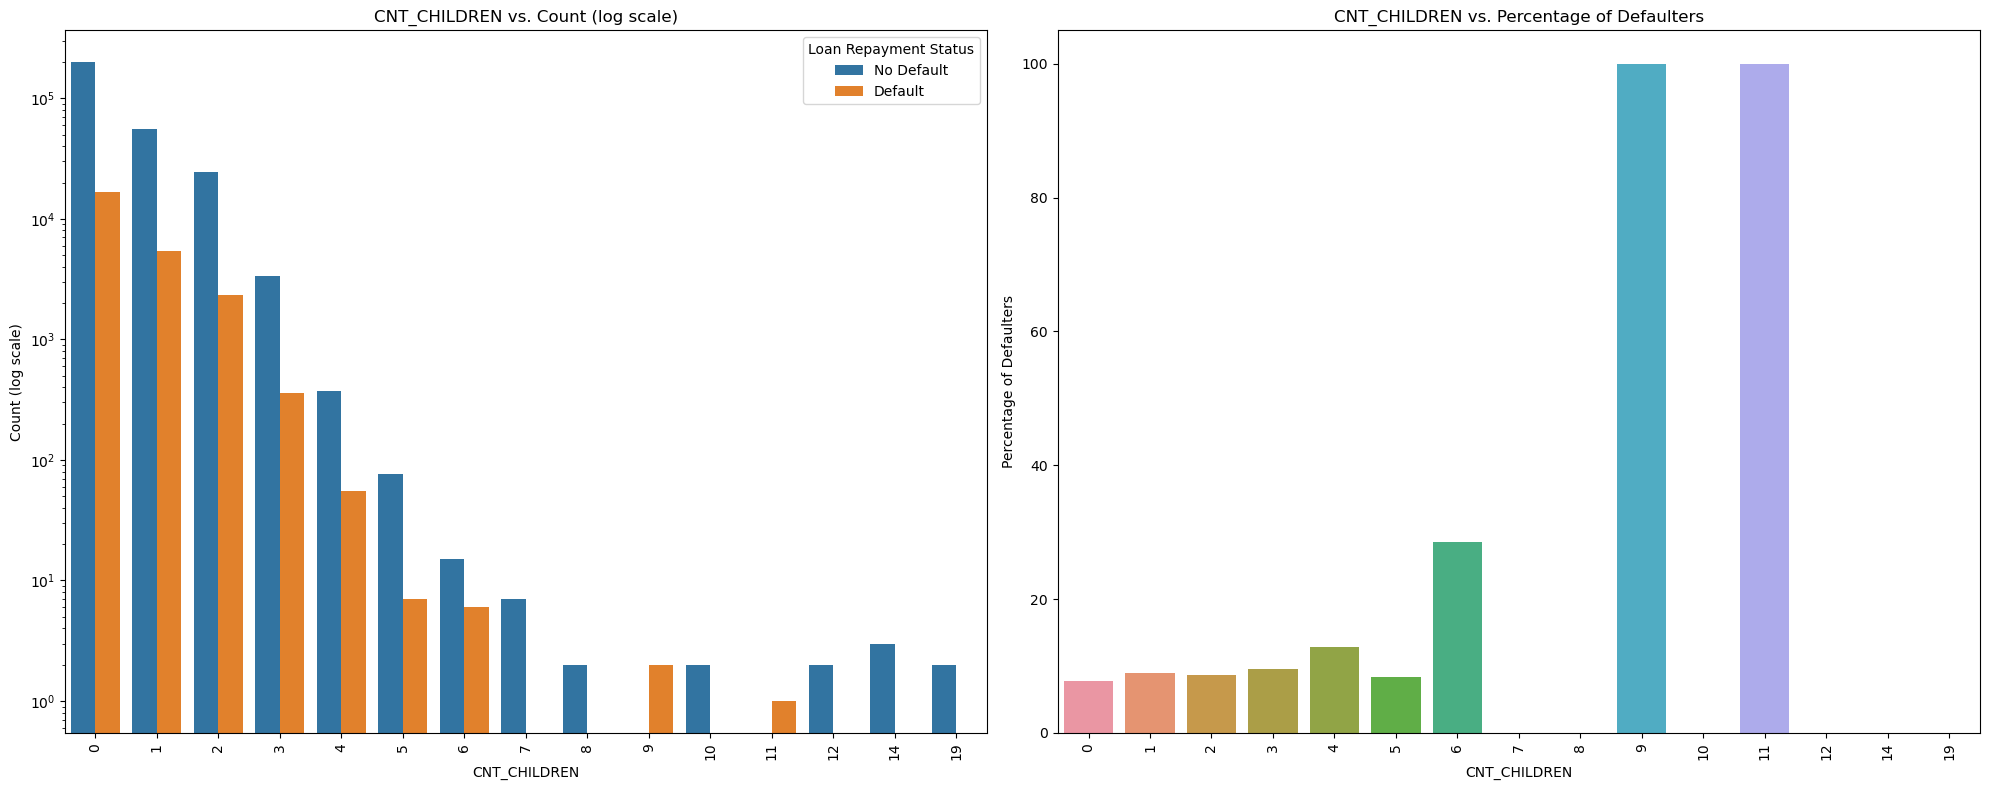

In [113]:
# Calculate the percentage of defaulters for each organization type
organization_type_percentages = data1.groupby('CNT_CHILDREN')['TARGET'].mean() * 100

# Create a figure with subplots
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot 1: Count of individuals in each organization type (log scale)
sns.countplot(data=data1, x='CNT_CHILDREN', hue='TARGET', ax=ax1)
ax1.set_xlabel('CNT_CHILDREN')
ax1.set_ylabel('Count (log scale)')  # Update the y-axis label
ax1.set_yscale('log')  # Set the y-axis to logarithmic scale
ax1.set_title('CNT_CHILDREN vs. Count (log scale)')
ax1.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot 2: Percentage of defaulters in each organization type
sns.barplot(x=organization_type_percentages.index, y=organization_type_percentages.values, ax=ax2)
ax2.set_xlabel('CNT_CHILDREN')
ax2.set_ylabel('Percentage of Defaulters')
ax2.set_title('CNT_CHILDREN vs. Percentage of Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

#### Key Takeaways

The majority of applicants do not have any children.

A small percentage of clients have more than three children.

Clients with more than four children exhibit a notably high default rate, particularly those with child counts of nine and eleven, which both show a 100% default rate.

In [74]:
#15 Examining the number of family members in relation to loan repayment status

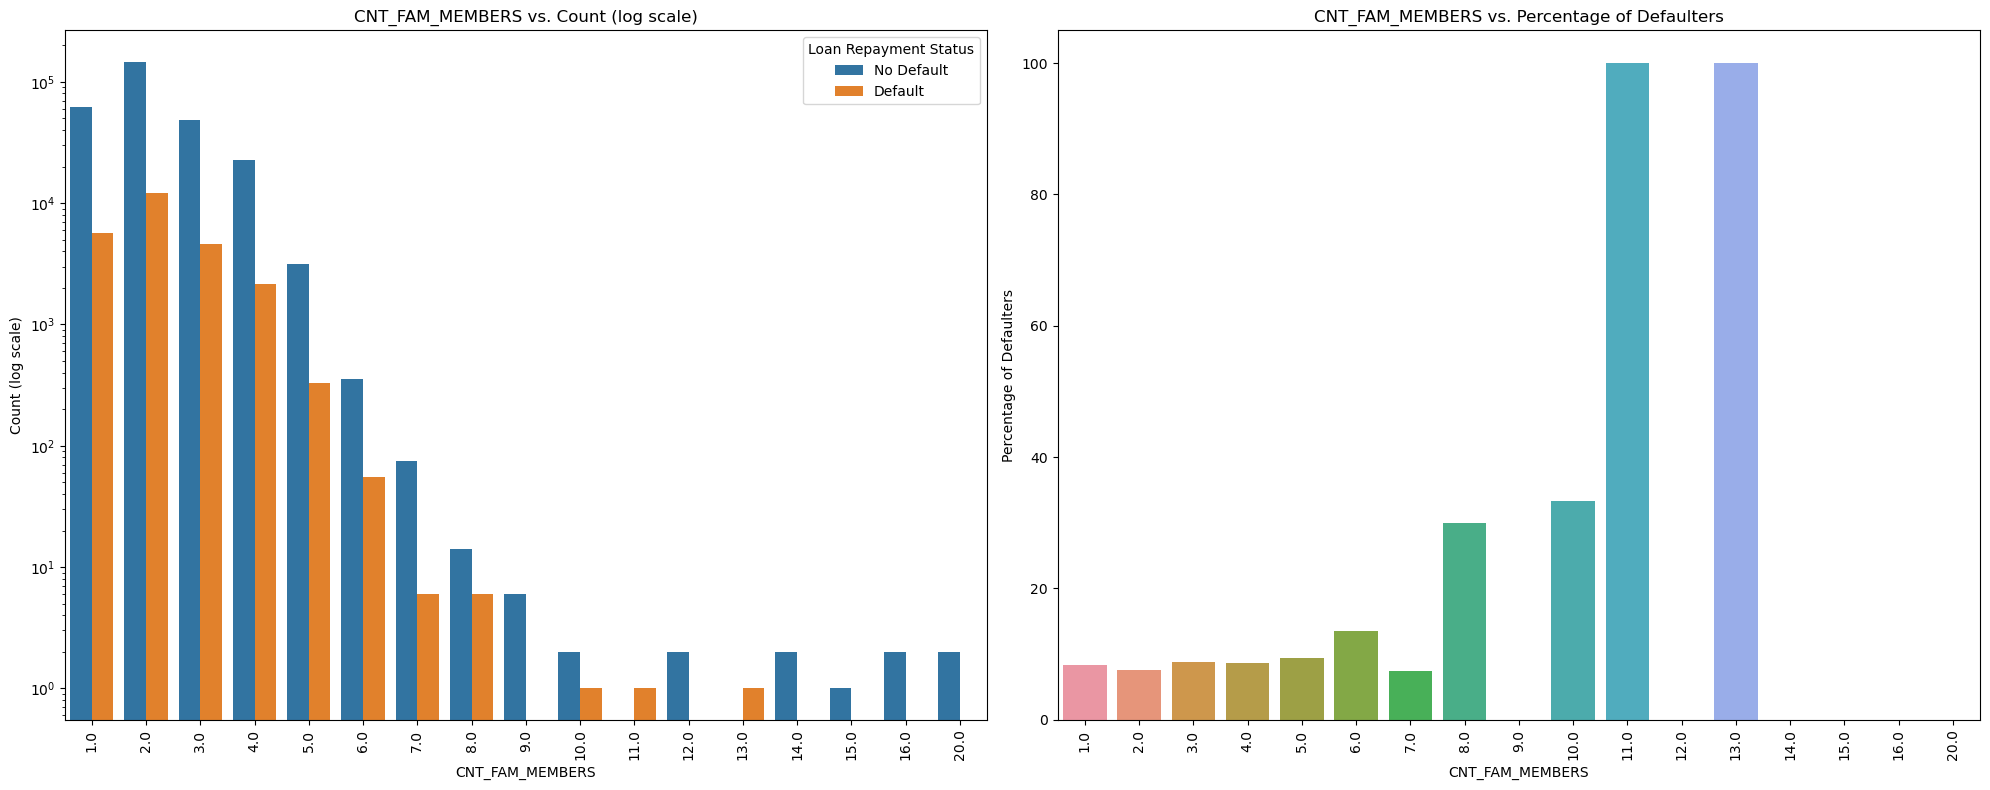

In [111]:
# Calculate the percentage of defaulters for each organization type
organization_type_percentages = data1.groupby('CNT_FAM_MEMBERS')['TARGET'].mean() * 100

# Create a figure with subplots
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot 1: Count of individuals in each organization type (log scale)
sns.countplot(data=data1, x='CNT_FAM_MEMBERS', hue='TARGET', ax=ax1)
ax1.set_xlabel('CNT_FAM_MEMBERS')
ax1.set_ylabel('Count (log scale)')  # Update the y-axis label
ax1.set_yscale('log')  # Set the y-axis to logarithmic scale
ax1.set_title('CNT_FAM_MEMBERS vs. Count (log scale)')
ax1.legend(title='Loan Repayment Status', labels=['No Default', 'Default'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot 2: Percentage of defaulters in each organization type
sns.barplot(x=organization_type_percentages.index, y=organization_type_percentages.values, ax=ax2)
ax2.set_xlabel('CNT_FAM_MEMBERS')
ax2.set_ylabel('Percentage of Defaulters')
ax2.set_title('CNT_FAM_MEMBERS vs. Percentage of Defaulters')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

#### Key Takeaways

The trend observed with family members is consistent with that of children, as having a higher number of family members also correlates with an increased risk of defaulting.

#### Analysis of Categorical Bivariate or Multivariate

In [76]:
data1.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count           mean            std       min  \
NAME_INCOME_TYPE                                                         
Businessman               10.0  652500.000000  627226.035812  180000.0   
Commercial associate   71617.0  202955.327289  147974.151536   26550.0   
Maternity leave            5.0  140400.000000  126856.907577   49500.0   
Pensioner              55362.0  136401.292273   76650.331247   25650.0   
State servant          21703.0  179737.969506  100880.579748   27000.0   
Student                   18.0  170500.000000  106644.682171   81000.0   
Unemployed                22.0  110536.363636   88055.079059   26550.0   
Working               158774.0  163169.889223  307577.685942   25650.0   

                           25%       50%       75%          max  
NAME_INCOME_TYPE                                                 
Businessman           225000.0  495000.0  843750.0    2250000.0  
Commercial associate  135000.0  180000.0  225000.0   18000090.0  
Maternity leave        67500.0   90000.0  135000.0     360000.0  
Pensioner              90000.0  117000.0  166500.0    2250000.0  
State servant         112500.0  157500.0  225000.0    3150000.0  
Student               112500.0  157500.0  178875.0     562500.0  
Unemployed             54000.0   78750.0  135000.0     337500.0  
Working               112500.0  135000.0  202500.0  117000000.0

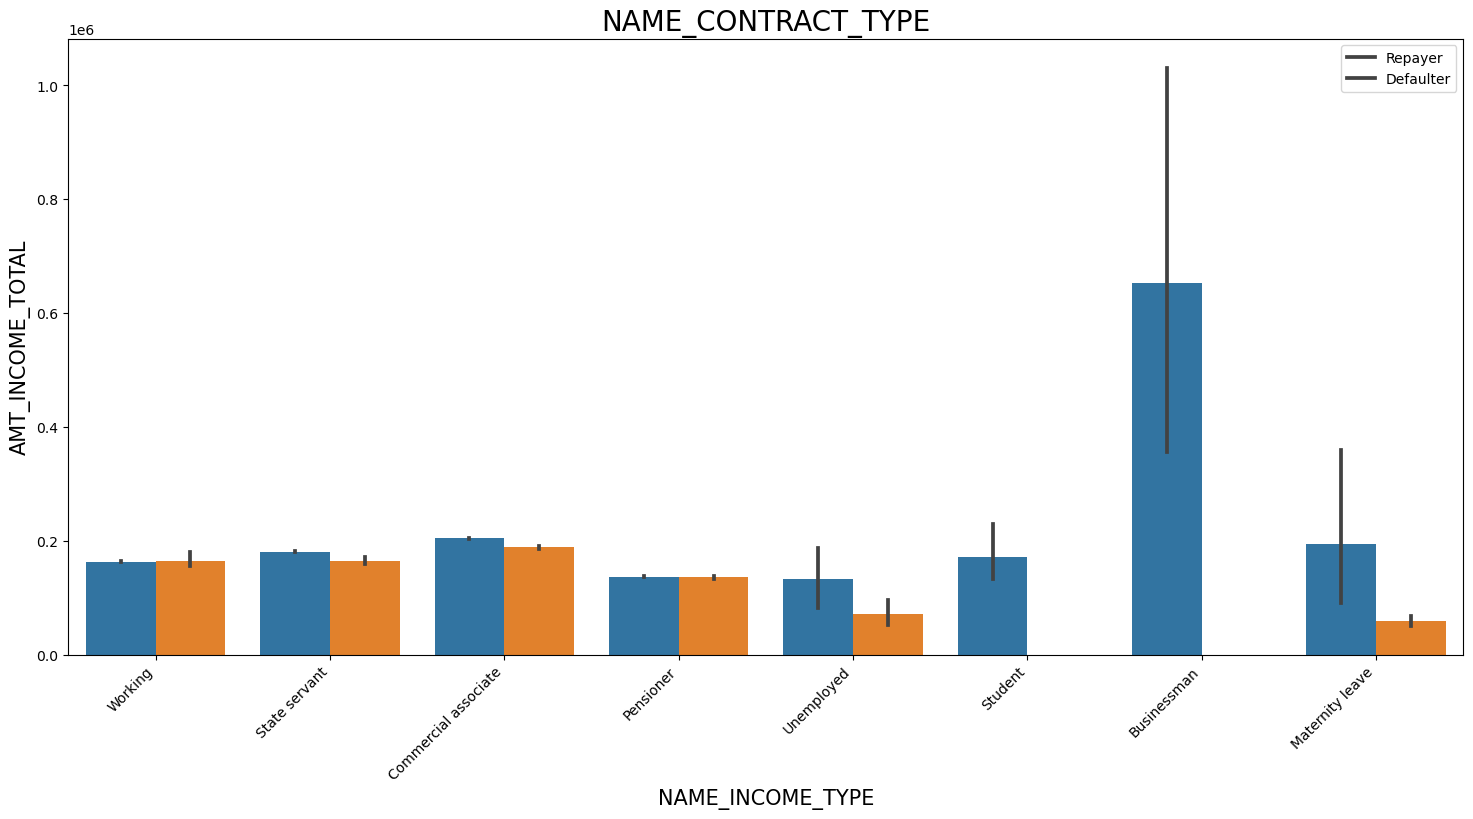

In [77]:
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",data1,"TARGET",(18,8),['Repayer','Defaulter'])

#### Key Takeaways

The data suggests that Businessmen tend to have the highest income. Based on our calculations at a default 95% confidence level, it appears that a Businessman's income may fall within a range that is somewhat above 4 lakhs and slightly beyond 10 lakhs.

#### Analysis of Numeric Variables

In [78]:
data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [79]:
# dividing the app_data dataframe into two sections based on Target values 0 and 1 for correlation and other analyses

In [80]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = data1.loc[data1['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = data1.loc[data1['TARGET']==1, cols_for_correlation]

In [81]:
len(cols_for_correlation)

41

#### Correlation between numerical variables

In [82]:
# Obtaining the top ten correlation  for the Repayers dataframe

# Calculating correlation for the 'Repayer_df' dataframe
corr_repayer = Repayer_df.corr()

# Creating a dataframe to store the correlations
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape), k=1).astype(bool)).unstack().reset_index()
corr_df_repayer.columns = ['VAR1','VAR2', 'Correlation']

# Removing rows with missing correlation values
corr_df_repayer.dropna(subset=["Correlation"], inplace=True)

# Taking absolute values of correlations
corr_df_repayer["Correlation"] = corr_df_repayer["Correlation"].abs()

# Sorting the dataframe by correlation values in descending order
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)

# Displaying the top ten correlations
top_10_correlations = corr_df_repayer.head(10)
top_10_correlations


VAR1                        VAR2  Correlation
122              AMT_GOODS_PRICE                  AMT_CREDIT     0.987250
371  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950149
300              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571
495  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
588      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
123              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686
92                   AMT_ANNUITY                  AMT_CREDIT     0.771309
216                DAYS_EMPLOYED                  DAYS_BIRTH     0.618048
335         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.539005
365  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537301

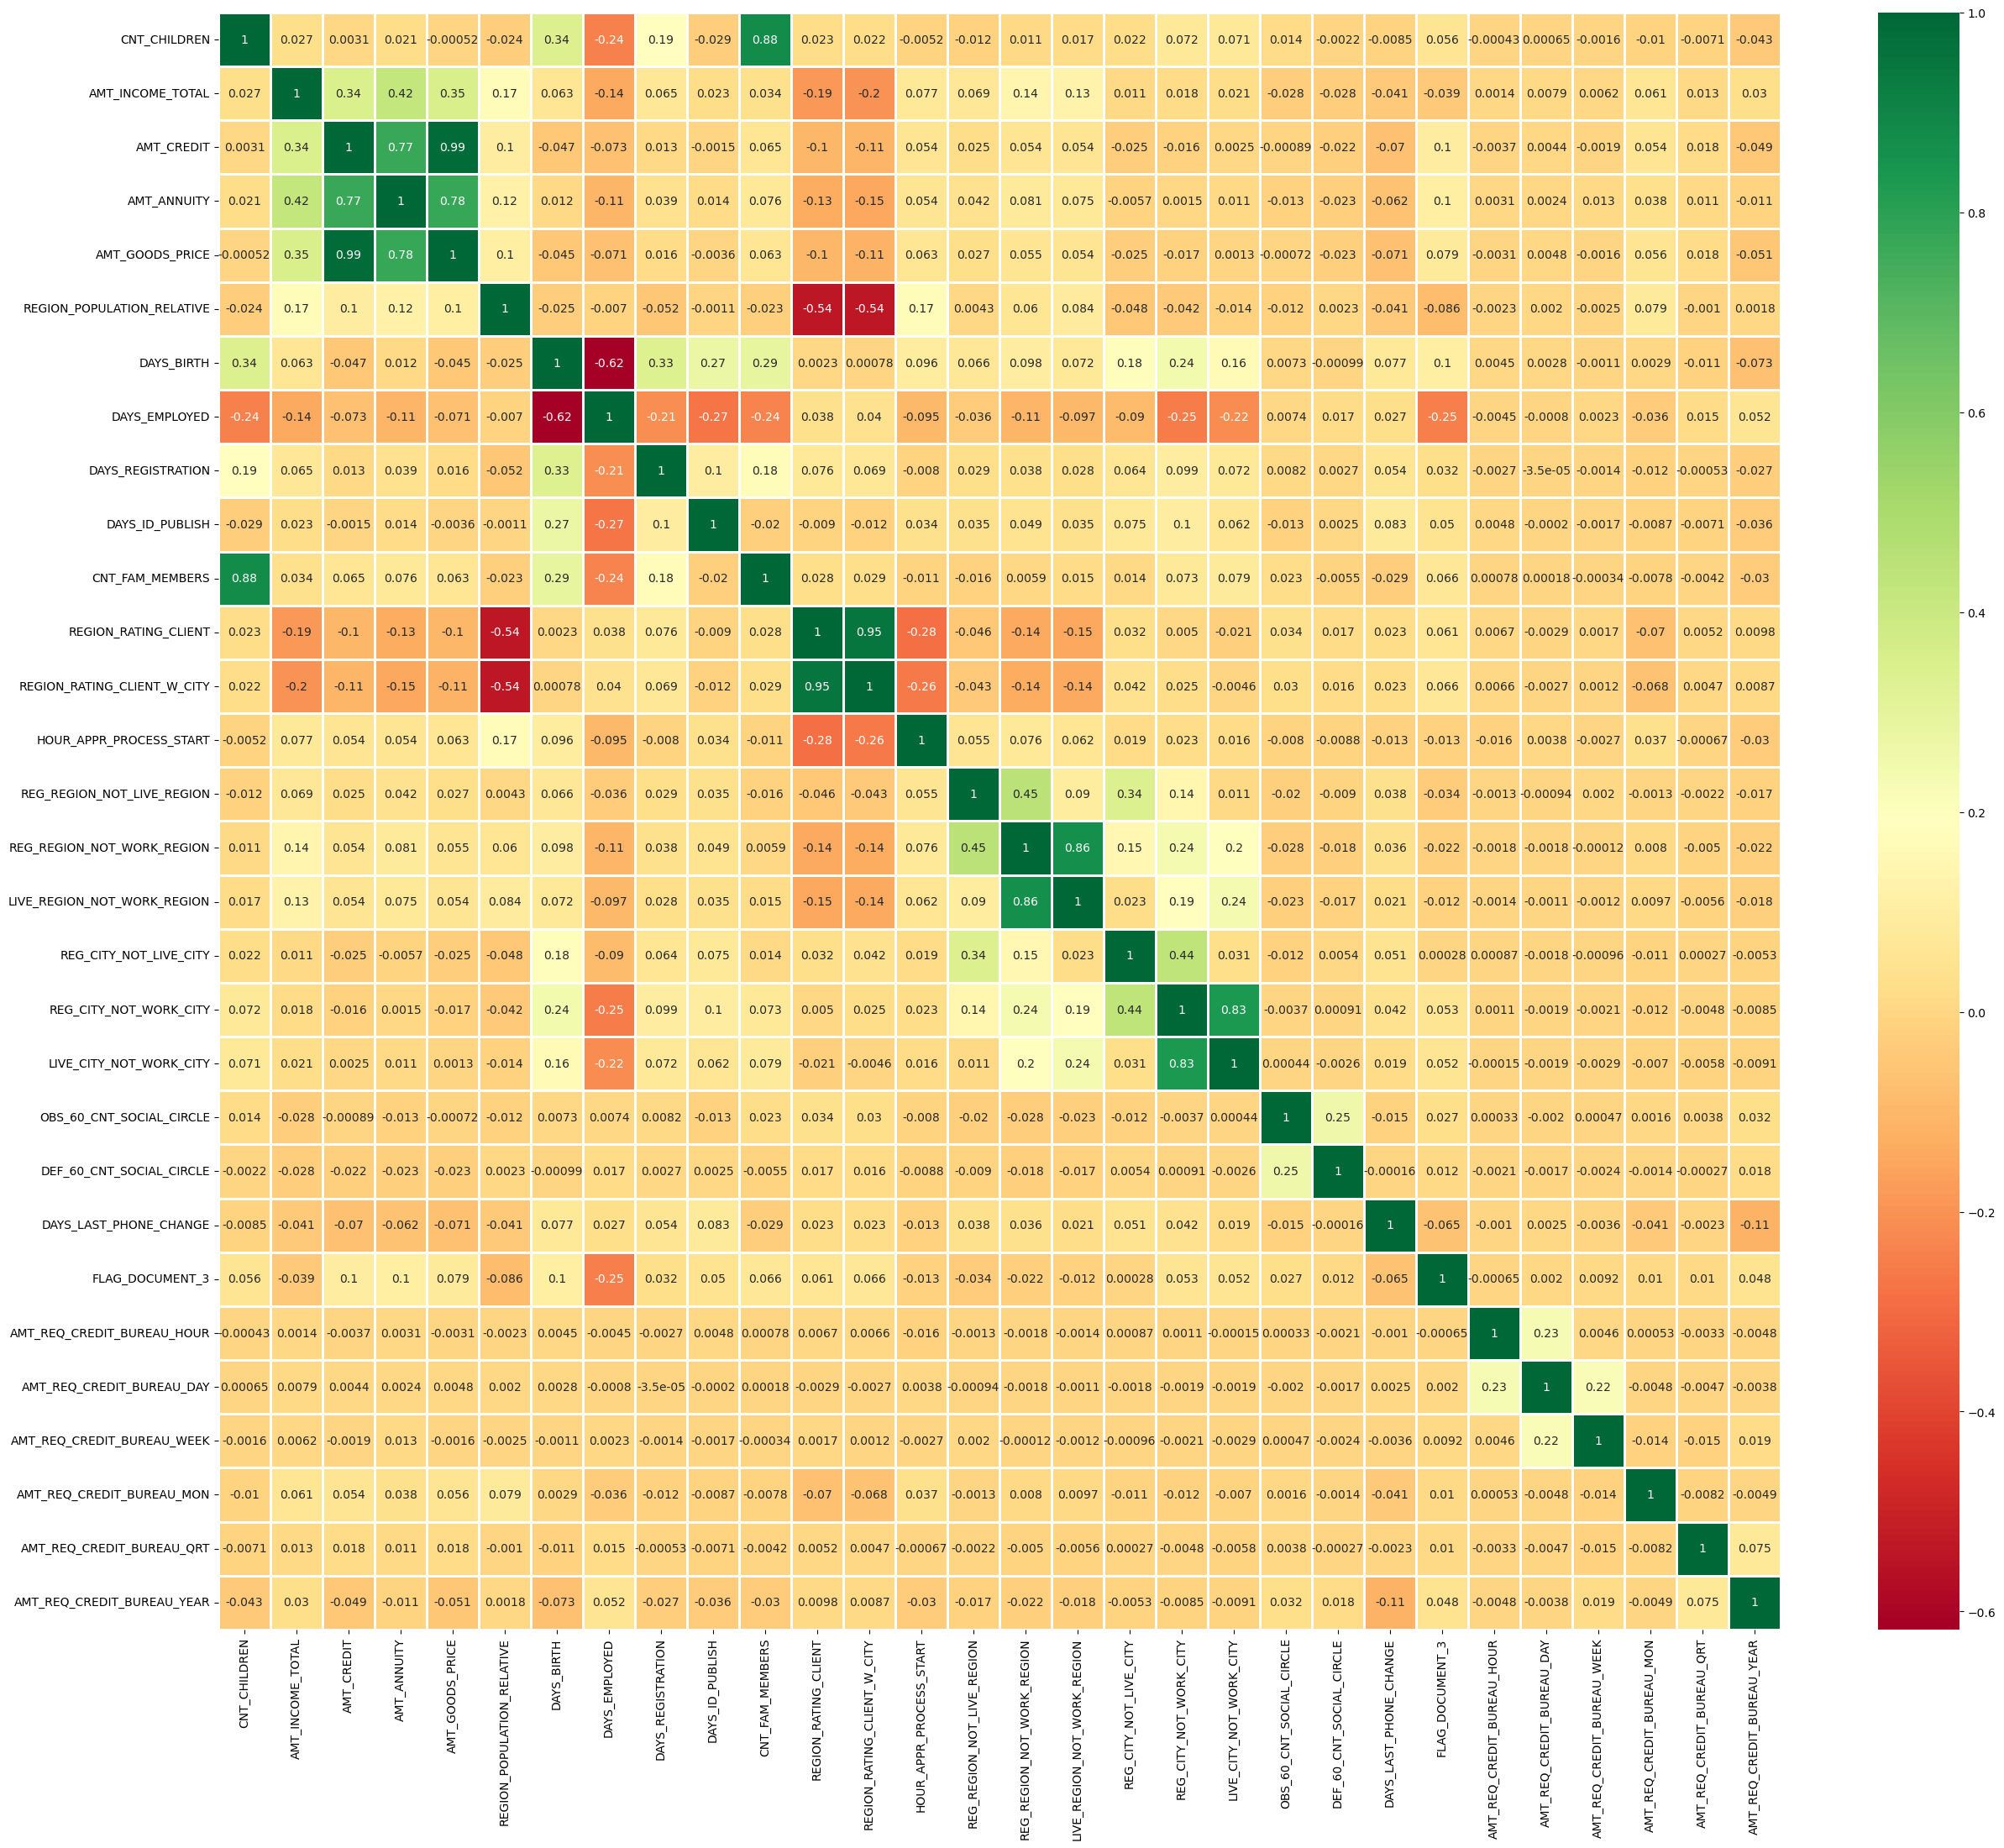

In [83]:
# Create a figure with a specified size
fig = plt.figure(figsize=(30, 25))

# Create a heatmap of correlations with annotations
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn", annot=True, linewidth=1)

# Display the heatmap
plt.show()


#### Key Takeaways

The amount of credit is highly correlated with the amount of the goods price, the loan annuity, and the total income.

We may also detect a strong association between repayers and the amount of days worked.

In [85]:
# Gathering the top ten correlations for the Defaulter data.

corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape), k=1).astype(bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df_Defaulter.dropna(subset=["Correlation"], inplace=True)
corr_df_Defaulter["Correlation"] = corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)


VAR1                        VAR2  Correlation
122              AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
371  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956637
300              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
495  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
588      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540
123              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
92                   AMT_ANNUITY                  AMT_CREDIT     0.752195
216                DAYS_EMPLOYED                  DAYS_BIRTH     0.575097
464   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937
557       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY     0.472052

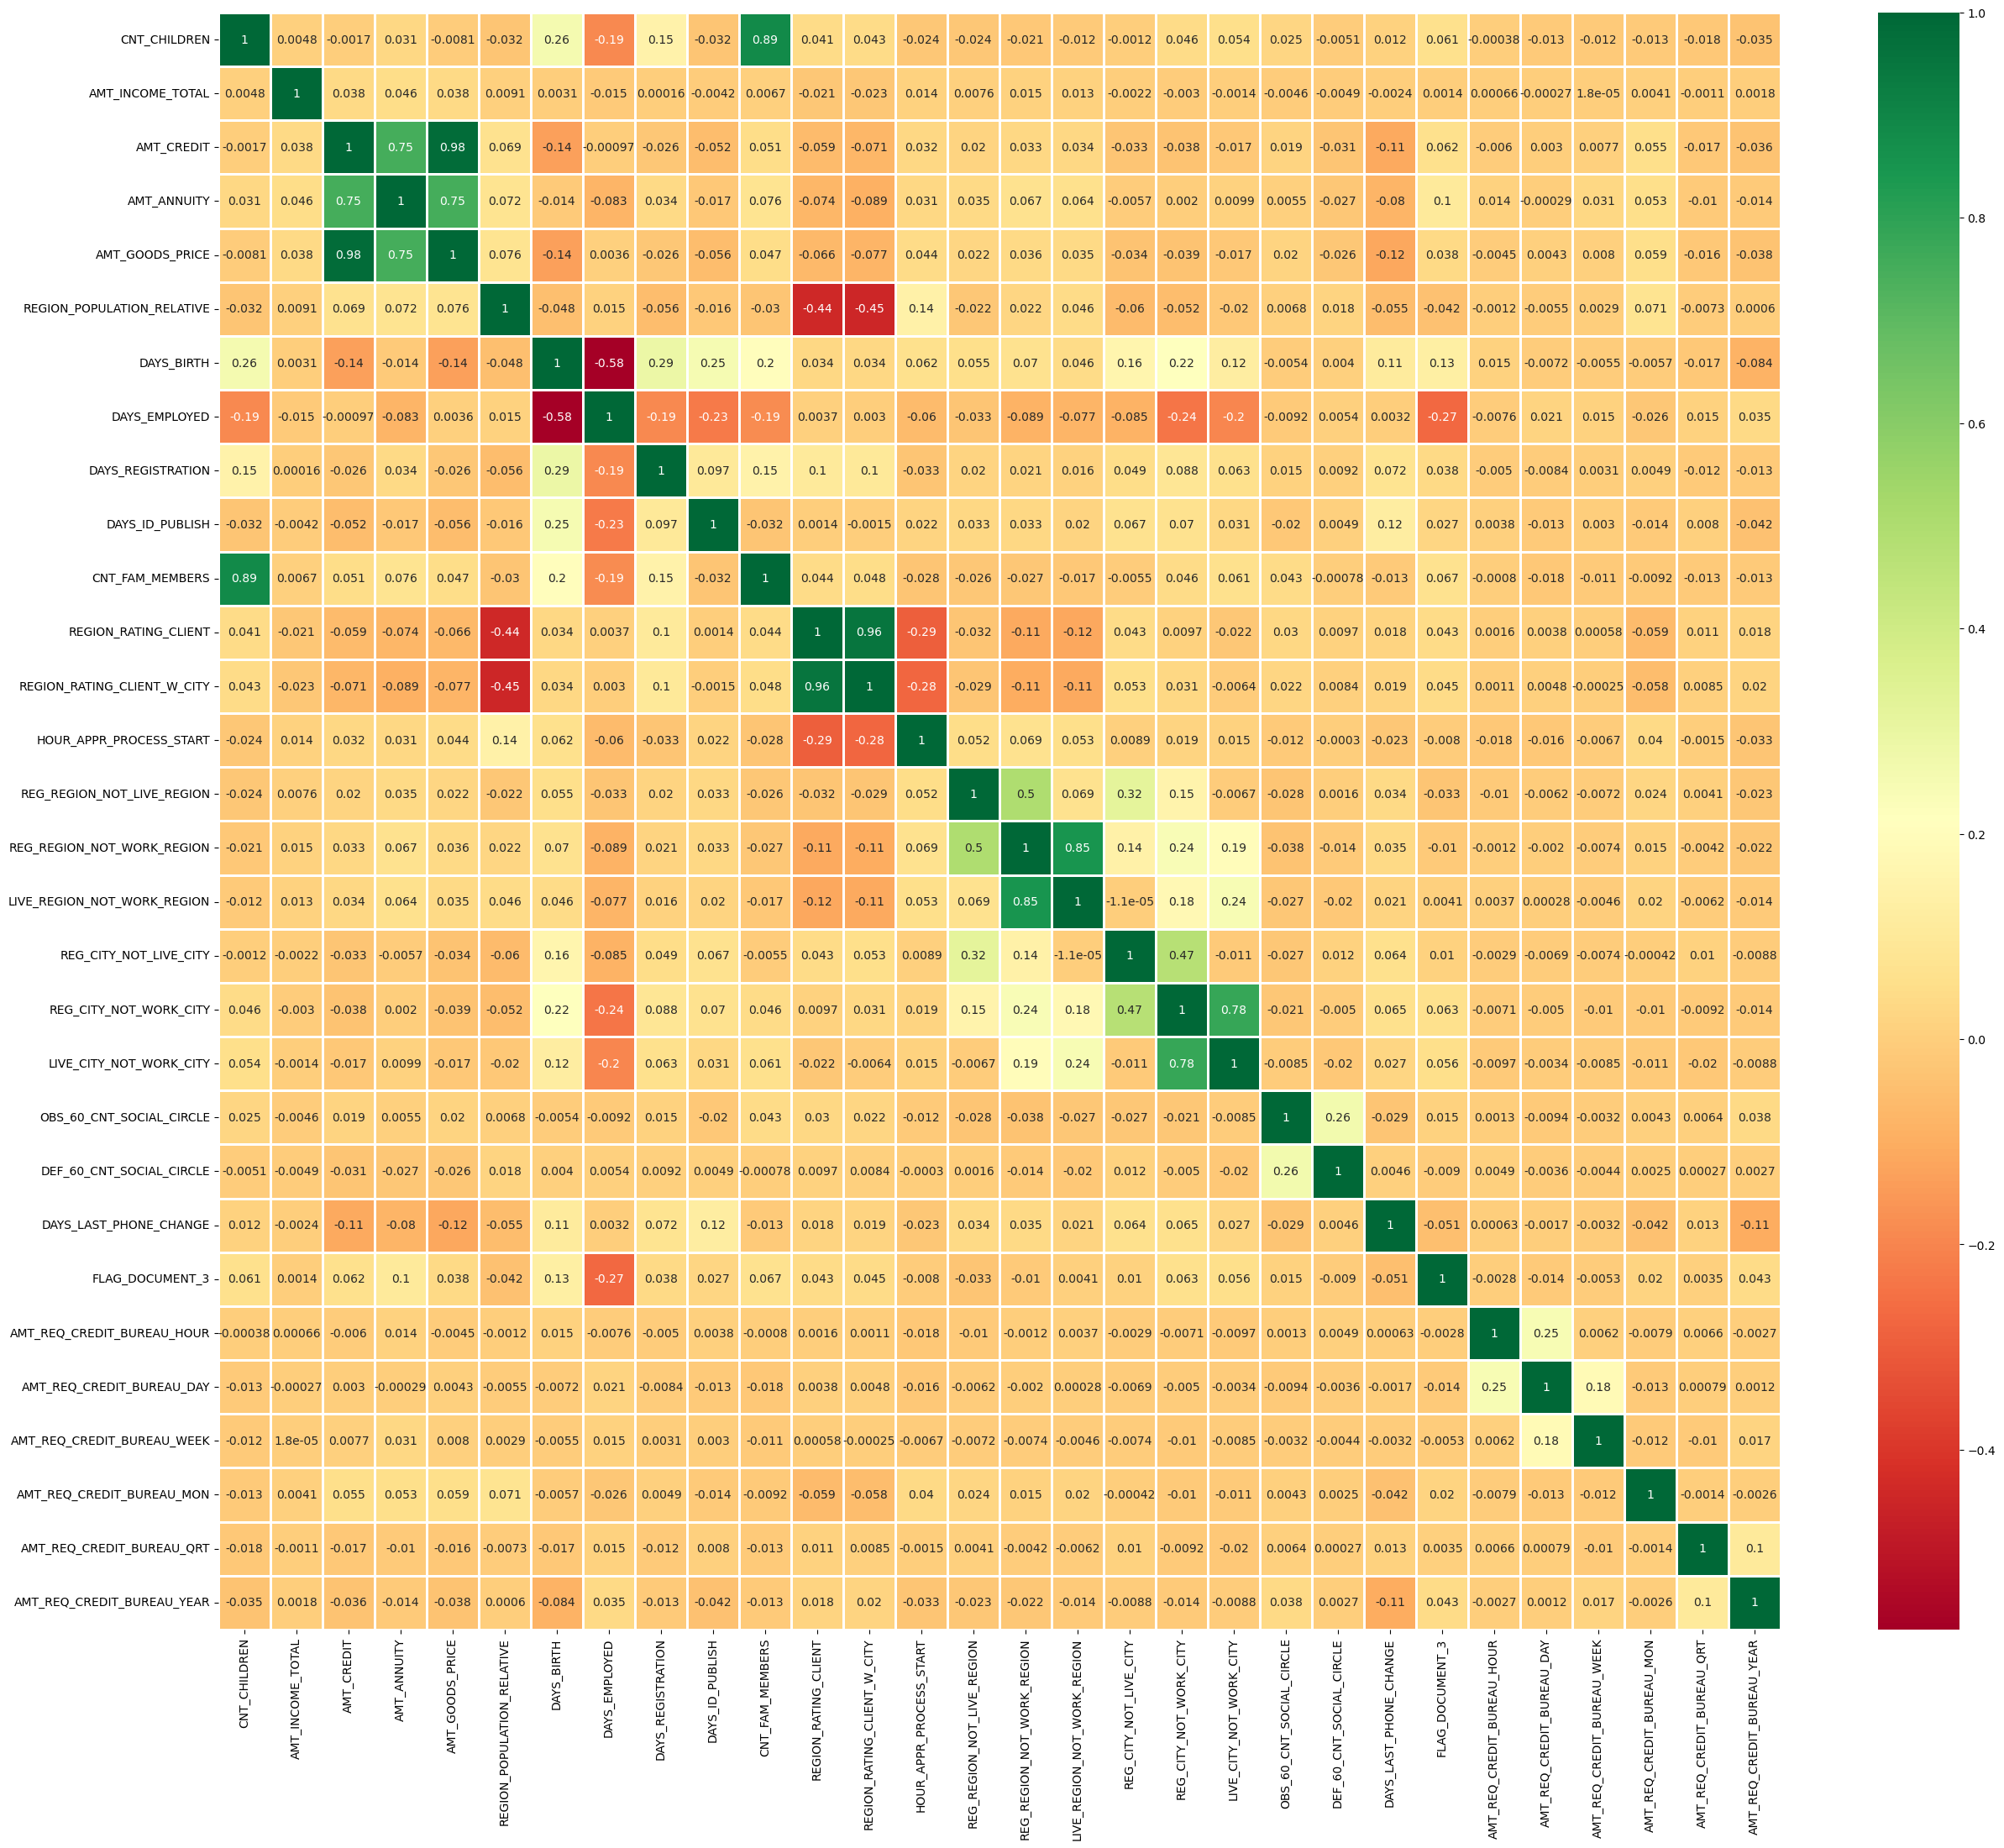

In [87]:
fig = plt.figure(figsize=(30,25))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

#### Key Takeaways

##### Credit Amount and Good Price Amount:

Both are highly correlated, indicating a strong relationship.

This correlation is consistent for repayers.

##### Loan Annuity and Credit Amount:

In repayers, there is a strong correlation of 0.77.

In defaulters, the correlation slightly reduces to 0.75.

##### Number of Days Employed:

Among repayers, there is a relatively high correlation of 0.62.

Among defaulters, the correlation is slightly lower at 0.58.

##### Total Income and Credit Amount:

A notable difference is observed between repayers and defaulters:

Repayers have a high correlation of 0.342.

Defaulters show a significantly lower correlation of 0.038.

##### Days Birth and Number of Children:

Among repayers, there is a correlation of 0.337.

Among defaulters, the correlation reduces to 0.259.

##### Social Circle and Defaulted to Observed Count:

For both repayers and defaulters:

The correlation with defaulted to observed count is relatively low.

Defaulters show a slightly higher correlation of 0.264 compared to repayers' 0.254.

#### Analysis of Numerical Univariate 

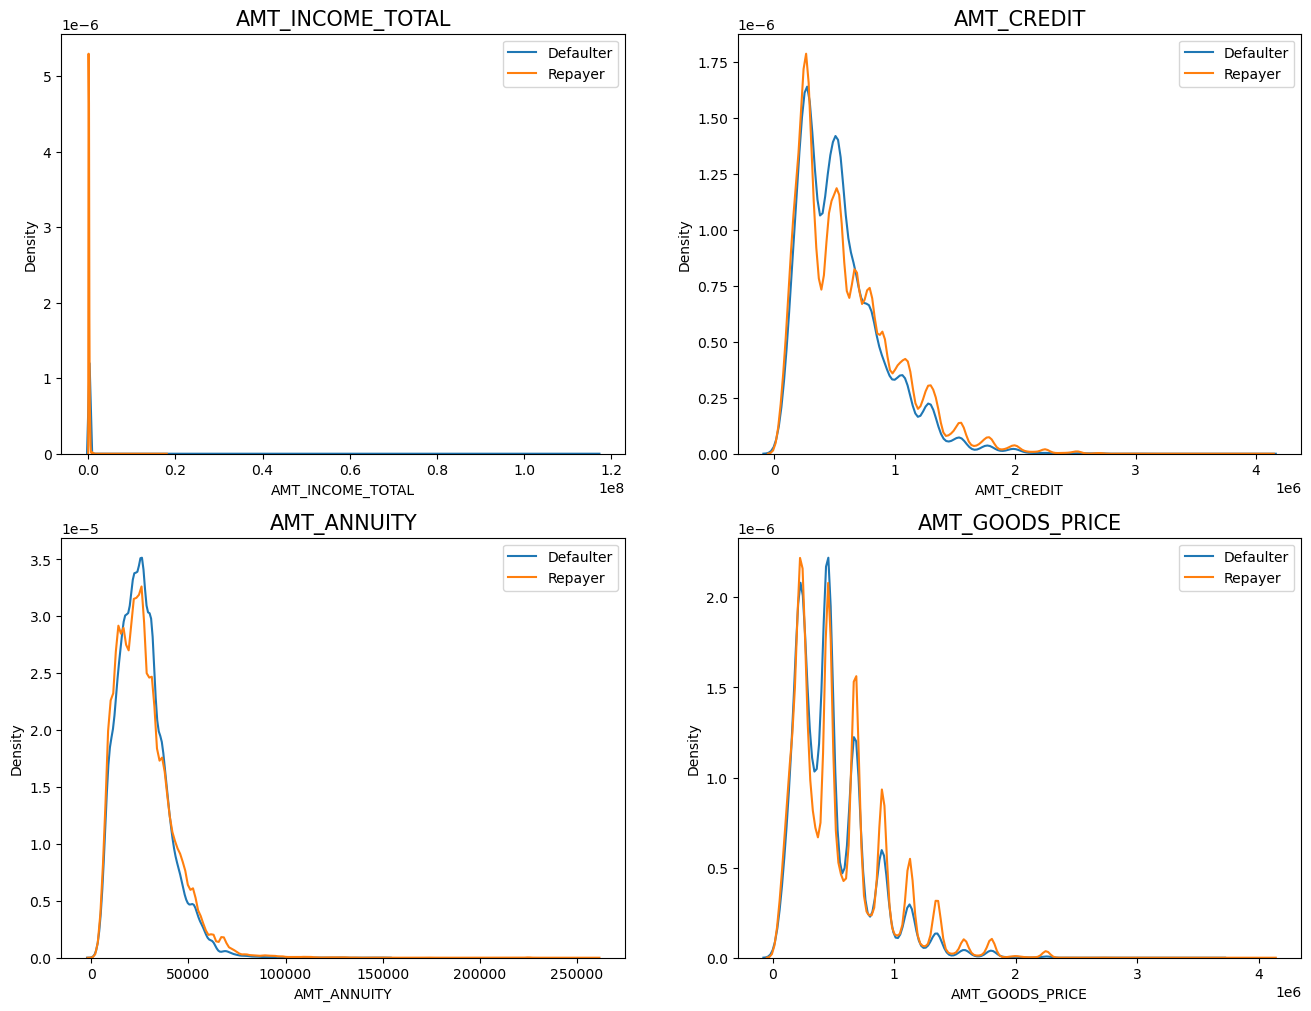

In [89]:
# Making a distribution plot using the numerical columns related to amount to determine density.

amount = data1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

#### Key Takeaways

##### Loan Amount for Goods:

The majority of loans are granted for goods priced below 10 lakhs.

##### Annuity Payment:

Most borrowers make annuity payments below 50,000 for their credit loans.

##### Credit Loan Amount:

The credit loan amount typically falls below 10 lakhs for most borrowers.

##### Repayers and Defaulters:

The distribution of repayers and defaulters overlaps in all the plots.

Consequently, using any of these variables in isolation may not be sufficient to make a definitive decision.

#### Analysis of Numerical Bivariate

<Figure size 1500x1500 with 0 Axes>

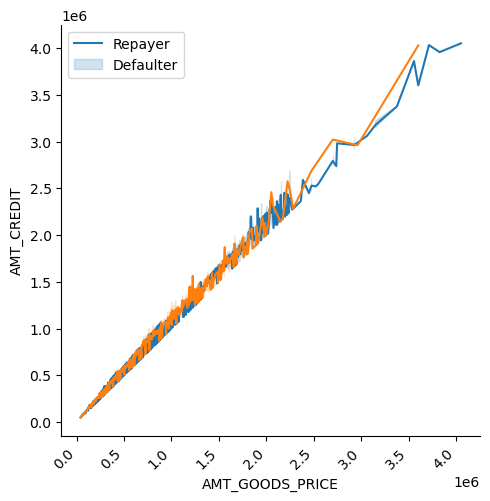

In [92]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',data1,"TARGET", "line",['Repayer','Defaulter'])
plt.show()

#### Key Takeaways

When the credit amount surpasses 30 lakhs, there is a notable rise in the occurrence of defaults.

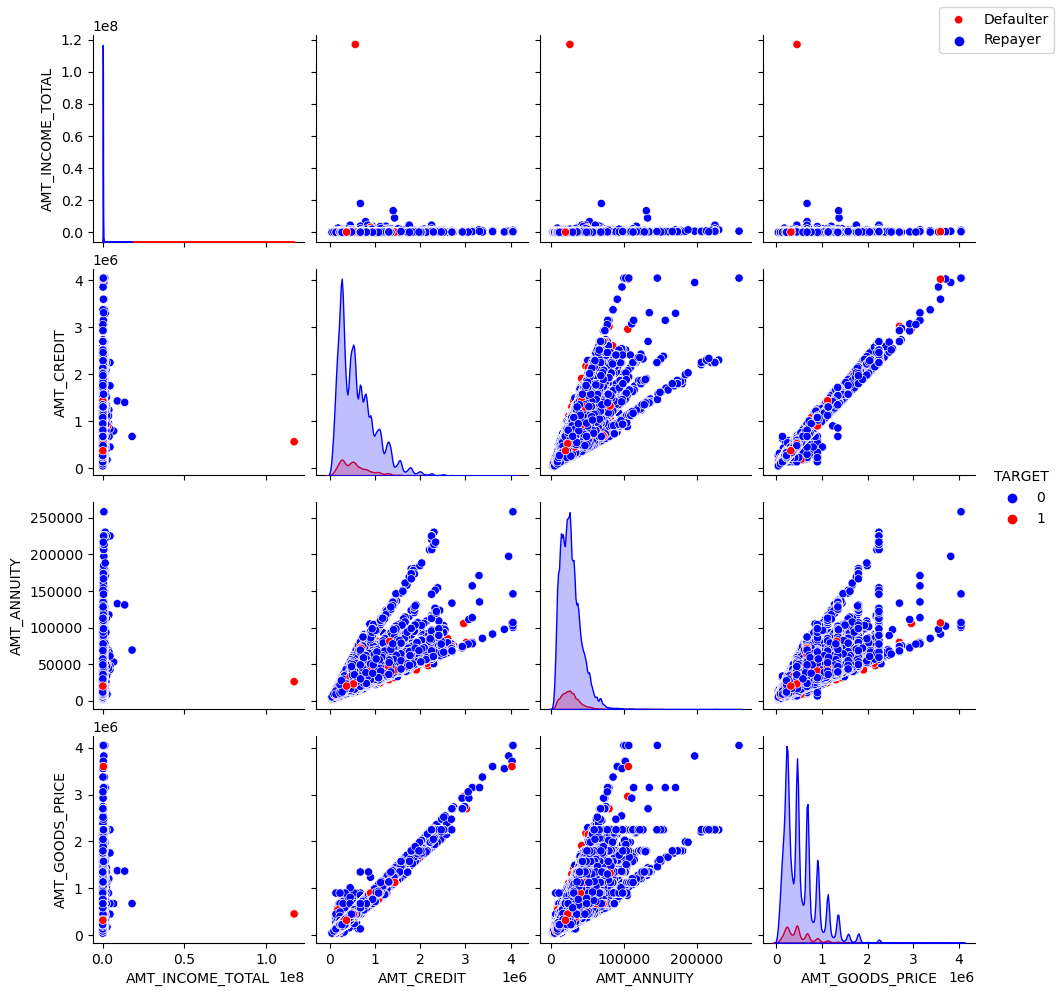

In [94]:
# Making a pairplot between the amount variable and the loan repayment status.

amount = data1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

#### Key Takeaways

##### Annuity Amount and Good Price Amount:

When the annuity amount exceeds 15,000 and the good price amount is greater than 20 lakhs, the likelihood of defaulters is reduced.

##### Loan Amount (AMT_CREDIT) and Goods Price (AMT_GOODS_PRICE):

There is a strong positive correlation between loan amount (AMT_CREDIT) and goods price (AMT_GOODS_PRICE).

The scatterplot reveals a concentration of data points forming a line, indicating a high correlation.

##### Loan Amount > 20 Lakhs:

There are notably fewer defaulters when the loan amount (AMT_CREDIT) exceeds 20 lakhs.

#### Analysis of Merged Dataframes

In [96]:
# Use Inner Joins to combine both dataframes on SK_ID_CURR.
loan_df = pd.merge(data1, data2, how='inner', on='SK_ID_CURR')
loan_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...         24.0       low_normal   
1        35698.5  ...         12.0       low_normal   
2        35698.5  ...          6.0           middle   
3        35698.5  ...         12.0           middle   
4         6750.0  ...          4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0          565.0   
1             Cash X-Sell: low           365243.0          716.0   
2   POS industry with interest           365243.0          797.0   
3  POS household with interest           365243.0         2310.0   
4  POS mobile without interest           365243.0          784.0   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                     125.0           25.0              17.0   
1                     386.0          536.0             527.0   
2                     647.0          647.0             639.0   
3                    1980.0         1980.0            1976.0   
4                     694.0          724.0             714.0   

   NFLAG_INSURED_ON_APPROVAL  YEARLY_DECISION  
0                        0.0                2  
1                        1.0                3  
2                        0.0                3  
3                        1.0                7  
4                        0.0                3  

[5 rows x 151 columns]

In [97]:
loan_df.shape

(1413701, 151)

In [99]:
# Splitting the "loan_df" dataframe into two subsets based on the "Target" values 0 and 1 for correlation and further analysis.

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

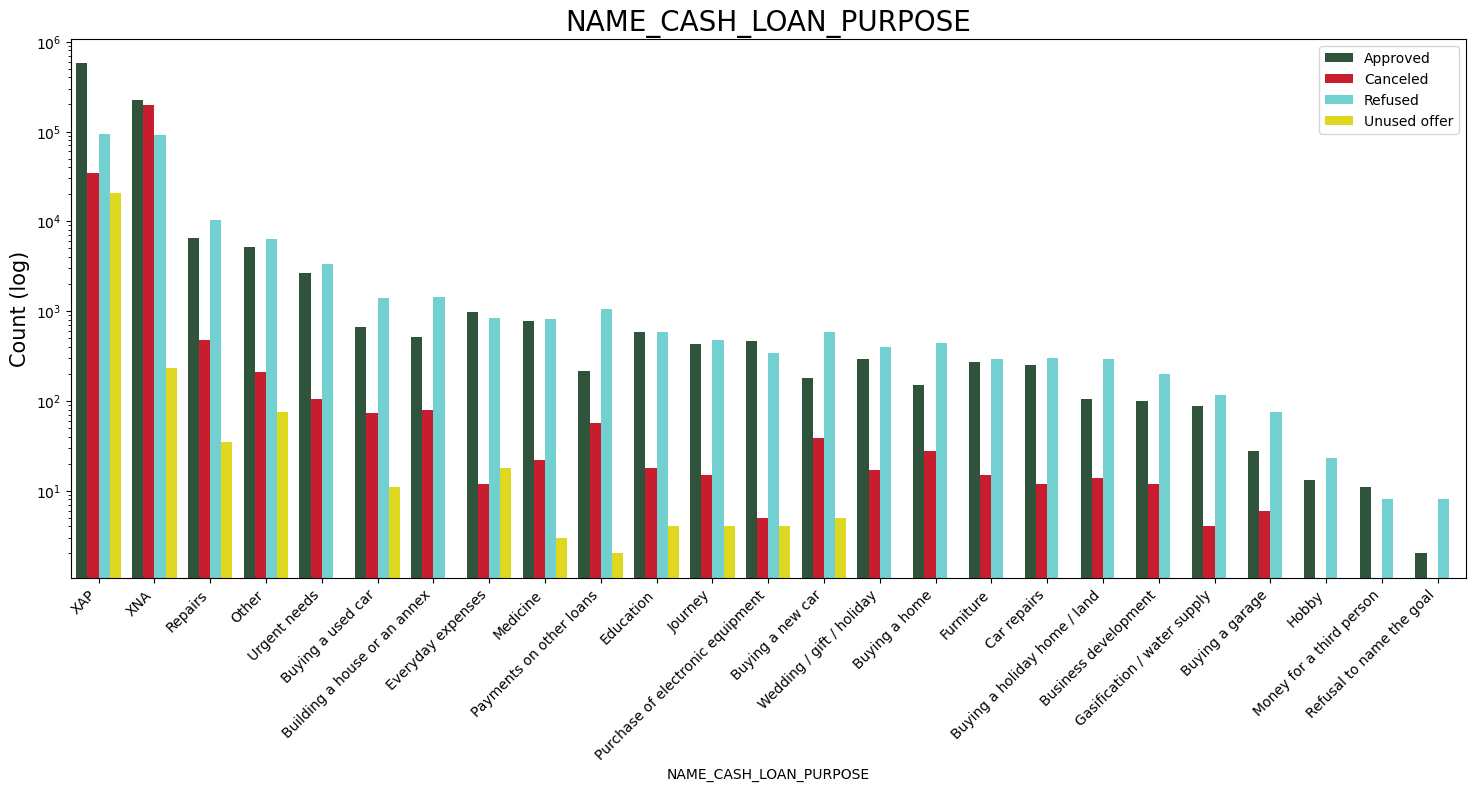

In [100]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

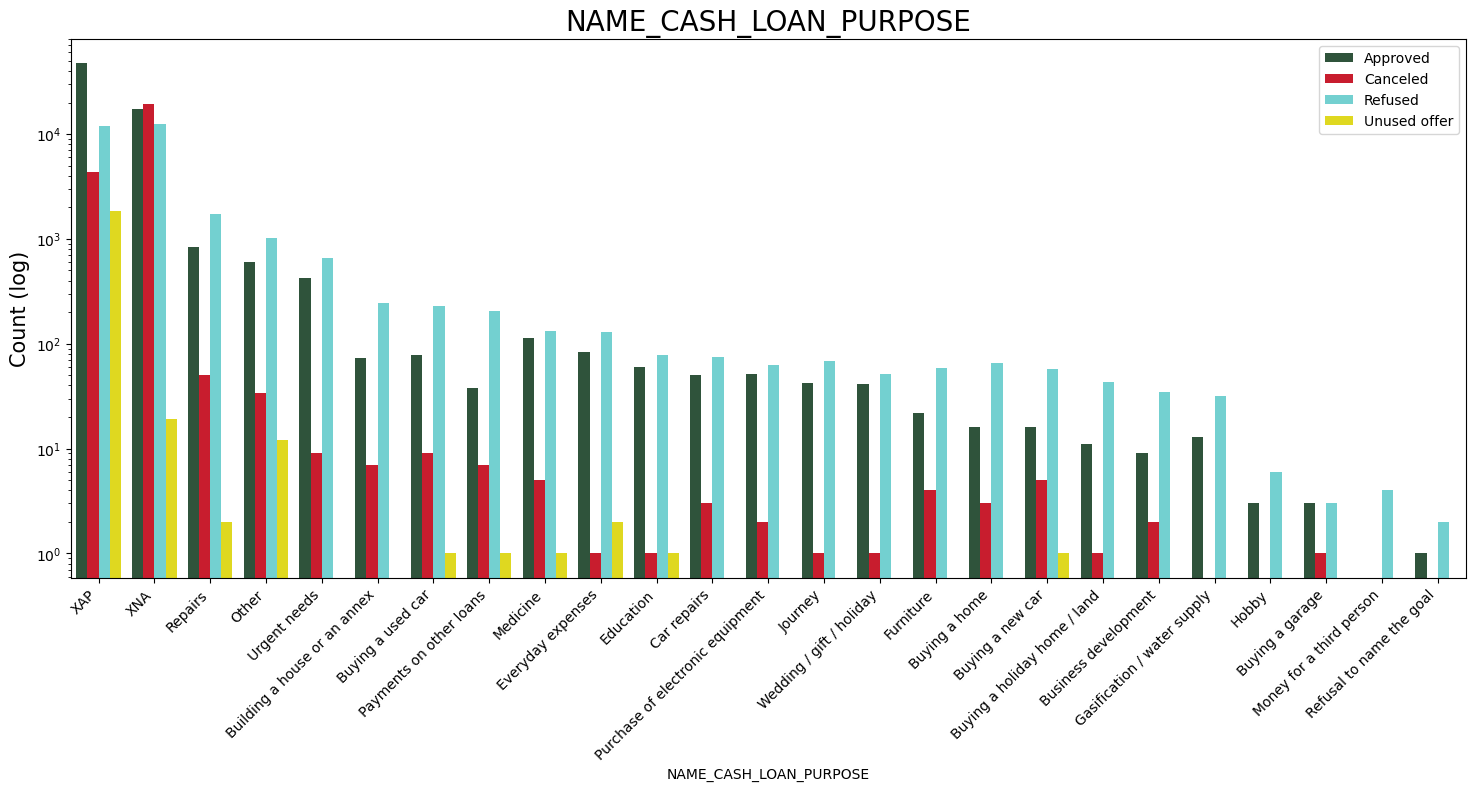

In [101]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

#### Key Takeaways

##### Loan Purpose and Unknown Values:

The "Loan purpose" category contains a high number of unknown values such as "XAP" and "XNA."

##### Default Rate for Repairs:

Loans taken for the purpose of "Repairs" exhibit the highest default rate among all loan purposes.

##### Application Rejections and Repairs/Other Purposes:

A significant number of loan applications for "Repair" or "Other" purposes have been rejected by the bank or refused by clients.

This suggests that loans for "Repairs" are considered high-risk by the bank.

Applicants either face rejections or are offered loans at high-interest rates, making them unfeasible for clients who then refuse the loans.

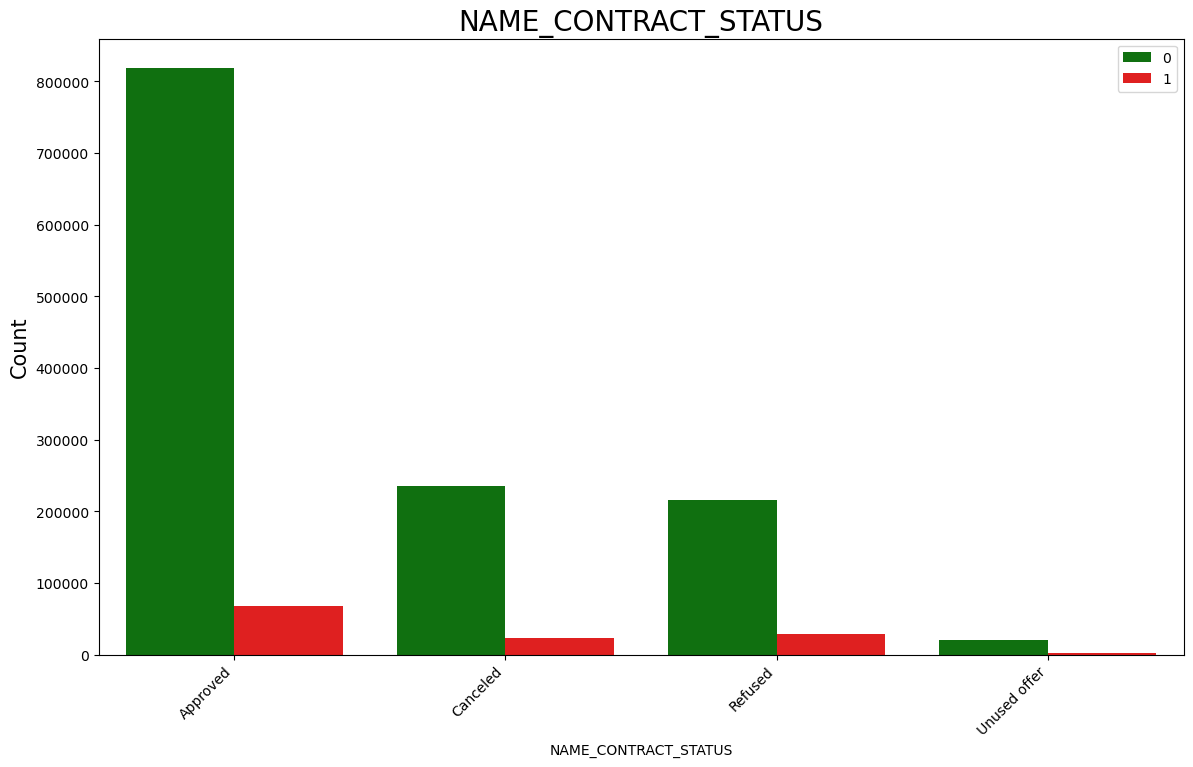

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [102]:
# Analyzing contract status based on loan repayment status to assess if there are any indications of business or financial losses.

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(14,8))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

#### Key Takeaways

##### Previously Cancelled Clients:

Among clients who were previously canceled, a remarkable 90% have successfully repaid their loans in the current case.

Revising interest rates could potentially enhance business opportunities for these clients.

##### Previously Refused Loan Applicants:

88% of clients who were previously refused a loan have repaid their loans in the current case.

Recording the refusal reasons for further analysis is advisable, as these clients may transform into potential reliable borrowers.

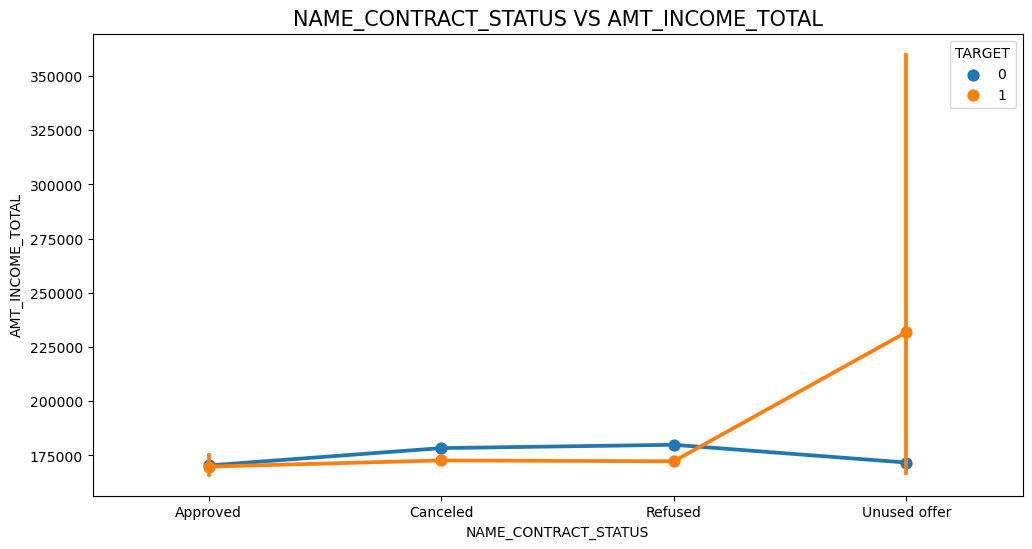

In [103]:
# Creating a plot to visualize the relationship between income total and contact status
pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

#### Key Takeaways

The point plot reveals that individuals who haven't previously used an offer have defaulted on their loans, even though their average income is higher than others. This suggests that prior offer usage may be a factor influencing loan repayment behavior.

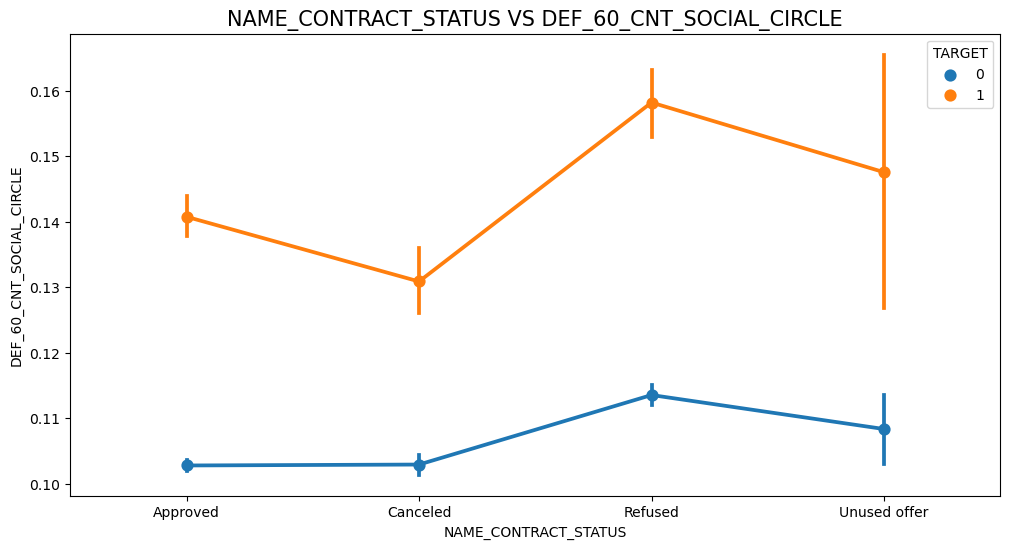

In [104]:
# Creating a plot to examine the relationship between clients who had defaulters in their social circle in the last 60 days and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

#### Key Takeaways

Clients with an average DEF_60_CNT_SOCIAL_CIRCLE score of 0.13 or higher tend to default more frequently. Analyzing a client's social circle could potentially assist in making more informed decisions regarding loan disbursement, as it appears to be correlated with loan default rates.

### Conclusions:

#### A. Factors Indicating Repayment Potential:

##### Education:
Applicants with academic degrees tend to default less.
##### Income Type: 
Students and businessmen have a low default rate.
##### Region Rating: 
Rating 1 regions appear safer.
##### Organization Type: 
Clients in trade types 4 and 5 and industry type 8 have defaulted less than 3%.
##### Age (DAYS_BIRTH): 
People above 50 have a lower probability of defaulting.
##### Employment Length (DAYS_EMPLOYED): 
Clients with 40+ years of experience have less than a 1% default rate.
##### Income Total (AMT_INCOME_TOTAL): 
Applicants with incomes above 700,000 are less likely to default.
##### Loan Purpose (NAME_CASH_LOAN_PURPOSE): 
Loans for hobbies and buying garages are most likely to be repaid.
##### Children (CNT_CHILDREN): 
Borrowers with zero to two children are more likely to repay their loans.

#### B. Factors Indicating Default Risk:

##### Gender (CODE_GENDER): 
Men have a relatively higher default rate.
##### Family Status (NAME_FAMILY_STATUS): 
Civilly married or single individuals default more.
##### Education (NAME_EDUCATION_TYPE): 
Lower secondary and secondary education levels have a higher default rate.
##### Income Type: 
Maternity leave or unemployed clients tend to default.
##### Region Rating: 
Regions with a rating of 3 have the highest defaults.
##### Occupation Type: 
Avoid low-skill laborers, drivers, waiters/barmen staff, security staff, laborers, and cooking staff due to high default rates.
##### Organization Type: 
Organizations with the highest loan default rates include Transport: type 3, Industry: type 13, Industry: type 8, and restaurants.
##### Age (DAYS_BIRTH): 
Young people aged 20-40 have a higher probability of defaulting.
##### Employment Length (DAYS_EMPLOYED): 
Clients with less than 5 years of employment have a high default rate.
##### Children (CNT_CHILDREN) & Family Members (CNT_FAM_MEMBERS): 
Clients with 9 or more children default 100%.

#### C. Factors for High-Interest Loans to Mitigate Default Risk:

##### Housing Type (NAME_HOUSING_TYPE): 
Many loan applicants live in rented apartments or with parents, so offering loans with higher interest rates to this group could mitigate potential losses.
##### Loan Amount (AMT_CREDIT): 
Loans between 3-6 lakhs tend to default more, so higher interest rates for this credit range may be advisable.
##### Income (AMT_INCOME_TOTAL): 
Since 90% of applicants have incomes less than 3 lakhs and a high probability of default, offering them loans with higher interest rates could mitigate risk.
##### Children (CNT_CHILDREN) & Family Members (CNT_FAM_MEMBERS): 
Clients with 4 to 8 children have a very high default rate, justifying higher interest rates.
##### Loan Purpose (NAME_CASH_LOAN_PURPOSE): 
Loans for "Repairs" have the highest default rate. A significant number of applications with purposes like "Repair" or "Other" were previously rejected, indicating a high-risk perception.

### Suggestions:

##### Previously Canceled Clients: 
Record the reasons for cancellation to negotiate terms with these repaying customers in the future and increase business opportunities.

##### Previously Refused Loan Applicants: 
Document the reasons for loan refusals to mitigate business losses, and consider offering loans to these clients who have now turned into reliable borrowers.